## Project 1

### DOMAIN: Healthcare

**CONTEXT**: 
    Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results. 
    
**DATA DESCRIPTION**: 
    The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
    
    1. P_incidence
    2. P_tilt
    3. L_angle 
    4. S_slope
    5. P_radius 
    6. S_degree
    7. Class
    
    
**PROJECT OBJECTIVE**: 
    Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

### Import and warehouse data:
    Import all the given datasets and explore shape and size of each.
    Merge all datasets onto one and explore final shape and size.

In [1]:
# importing required library for developing model and for doing data analysis
import pandas as pd
import glob
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

In [2]:
filepath = r'.' #assuming the files are in same directory - as this notebook file is
fileslist = glob.glob(filepath + "/Part1*.csv")

li = []

print("shape and size of each file :: \n")
#importing all datasets, exploring each dataset shape and size
for file in fileslist:
    df = pd.read_csv(file, index_col=None, header=0)
    print(file , " is of size :: ", df.size)
    print(file , " is having  ", df.shape[0], "rows,  and ", df.shape[1], " Columns \n")
    li.append(df)

df_concatenated = pd.concat(li, axis=0, ignore_index=True)
#Merge all datasets onto one

shape and size of each file :: 

.\Part1 - Normal.csv  is of size ::  700
.\Part1 - Normal.csv  is having   100 rows,  and  7  Columns 

.\Part1 - Type_H.csv  is of size ::  420
.\Part1 - Type_H.csv  is having   60 rows,  and  7  Columns 

.\Part1 - Type_S.csv  is of size ::  1050
.\Part1 - Type_S.csv  is having   150 rows,  and  7  Columns 



In [3]:
#concatenated DataFrame
print("Final dataframe shape :: " ,df_concatenated.shape)
print("Final dataframe size",df_concatenated.size)

Final dataframe shape ::  (310, 7)
Final dataframe size 2170


**Observation**:

    There are 3 dataframes created from each individual files.
    There are 310 records in the final dataframe which has data for Normal, Type_H and Type_S class

### Data cleansing:
    Explore and if required correct the datatypes of each attribute
    Explore for null values in the attributes and if required drop or impute values.

In [4]:
df_spondylolisthesis  = df_concatenated
df_spondylolisthesis.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

    Class is object we need to change the datatype of this column

In [5]:
#check if there are any null values
df_spondylolisthesis.isnull().values.any()

False

    There are no null values.

In [6]:
df_spondylolisthesis.sample(15)

P_incidence     P_tilt     L_angle    S_slope    P_radius    S_Degree  \
184    76.326002  42.396204   57.200000  33.929797  124.267007   50.127457   
124    36.125683  22.758753   29.000000  13.366931  115.577116   -3.237562   
307    74.094731  18.823727   76.032156  55.271004  128.405731   73.388216   
253    57.286945  15.149350   64.000000  42.137595  116.735387   30.341203   
109    36.686353   5.010884   41.948751  31.675469   84.241415    0.664437   
30     41.646916   8.835549   36.031975  32.811367  116.555168   -6.054538   
257    44.216464   1.507075   46.110339  42.709390  108.629567   42.810481   
93     34.382299   2.062683   32.390820  32.319617  128.300199   -3.365516   
116    63.834982  20.362507   54.552434  43.472475  112.309492   -0.622527   
14     89.834676  22.639217   90.563461  67.195460  100.501192    3.040973   
297    58.828379  37.577873  125.742385  21.250506  135.629418  117.314683   
207    78.425951  33.425951   76.277439  45.000000  138.554111   77.155172   
261    67.263149   7.194661   51.696887  60.068488   97.801085   42.136943   
113    53.572170  20.460828   33.100000  33.111342  110.966698    7.044803   
208    63.172987   6.330911   63.000000  56.842076  110.644021   42.608076   

      Class  
184  Type_S  
124  Type_H  
307  Type_S  
253  Type_S  
109  Type_H  
30    Nrmal  
257  Type_S  
93   Normal  
116  Type_H  
14    Nrmal  
297    tp_s  
207  Type_S  
261  Type_S  
113  Type_H  
208  Type_S

    Running above cell multiple times will help in view different sets of data
    it looks like we need to have closer look at "Class" column

In [7]:
df_spondylolisthesis["Class"].unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

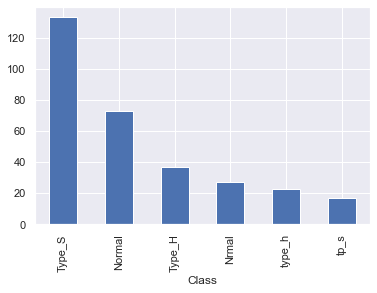

In [8]:
df_spondylolisthesis.value_counts(df_spondylolisthesis["Class"]).plot(kind="bar");

**Observation**:
    
    The Class column needs transforamtion, we need to correct the values.
    Here TypeH and type_h, tp_s and Type_S, Normal and Nrmal represents same class.

In [9]:
df_spondylolisthesis.loc[df_spondylolisthesis['Class']=='tp_s','Class']='Type_S'
df_spondylolisthesis.loc[df_spondylolisthesis['Class']=='Nrmal','Class']='Normal'
df_spondylolisthesis.loc[df_spondylolisthesis['Class']=='type_h','Class']='Type_H'

In [10]:
df_spondylolisthesis['Class']=df_spondylolisthesis['Class'].astype('category') #changing to category datatype

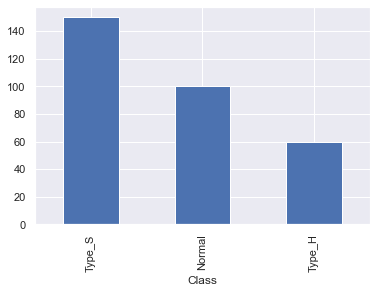

In [11]:
df_spondylolisthesis.value_counts(df_spondylolisthesis["Class"]).plot(kind="bar");

In [12]:
df_spondylolisthesis['Class'].nunique()

3

In [13]:
df_spondylolisthesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


#### Data analysis & visualisation:
    Perform detailed statistical analysis on the data.
    Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

In [14]:
#Checking data using describe
df_spondylolisthesis.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082

    Above table provides some basic statistical details like percentile, mean, std etc. of a data.
    All Feature variables are with numerical data.
    
    Observation on each column are mentioned below
        
**P_incidence** - 
            75% of values are less than 72 and max value observed is 129.83, we need to plot boxplot to check for any outliers.
            Mean and Median values are not having much difference and are nearly equal.
            Distribution might be normal.
            
**P_tilt** - 
            Mean and Median values are not having much difference and are nearly equal.
            Distribution might be normal.
            This feature(column) contains negative values.
            
**L_angle** -
            Mean and Median values are not having much difference and are nearly equal.
            Distribution might be normal.
            Since max and 75% has difference - there might be some outliers
            
**S_slope** - 
            Mean and Median values are not having much difference and are nearly equal.
            Distribution might be normal.
            75% of values are lesser than 52 but maximum value is 121.4 .
            
**P_radius** - 
            Mean and Median values are not having much difference and are nearly equal.
            Distribution might be normal.
            
**S_Degree** - 
            Difference between 75% and max is large, so we can view the data once to check if there is any outlier.
            The median and mean are not close and mean is greater than median and hence it is a positively skewed distribution.
            In general, mean and min differ - so we need to check for distribution of data (skweness).

###### Lets check the distribution of data for all feature variables, we can use distplot, boxplot/violinplot, swarm plot for univariate and bivariate analysis. 

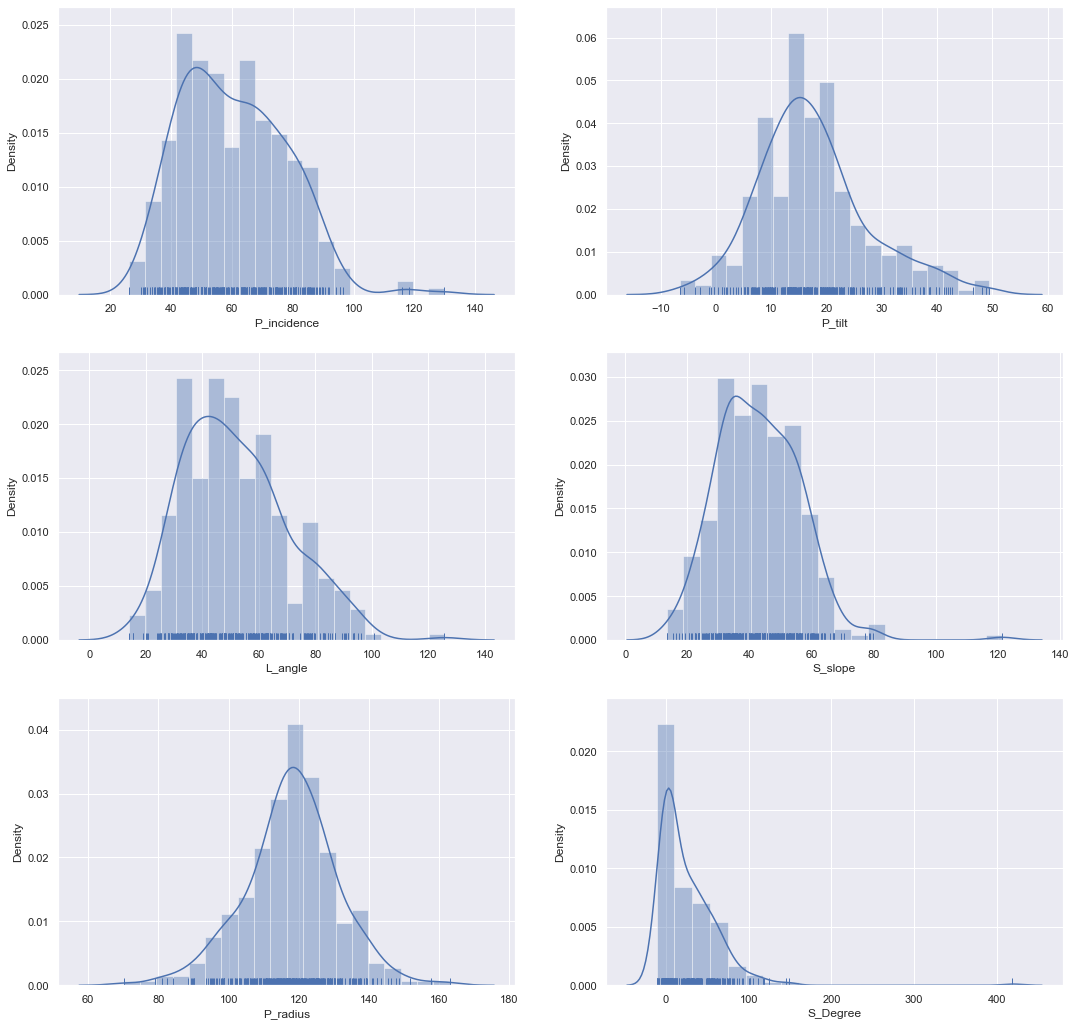

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['P_incidence',
 'P_tilt',
 'L_angle',
 'S_slope',
 'P_radius',
 'S_Degree']
len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.distplot(df_spondylolisthesis[listOfColumns[index]],bins=20,rug=True,ax = ax[j][i]);            
            index = index + 1 
fig.show()

    S_Degree data seems to have outlier, and data is positively skewed distribution
    P_incidence, P_tilt, L_angle, S_slope, P_radius - data distribution is normal. There are not outlier which are visible.
    To check on outlier explicitly, let's use box plot.

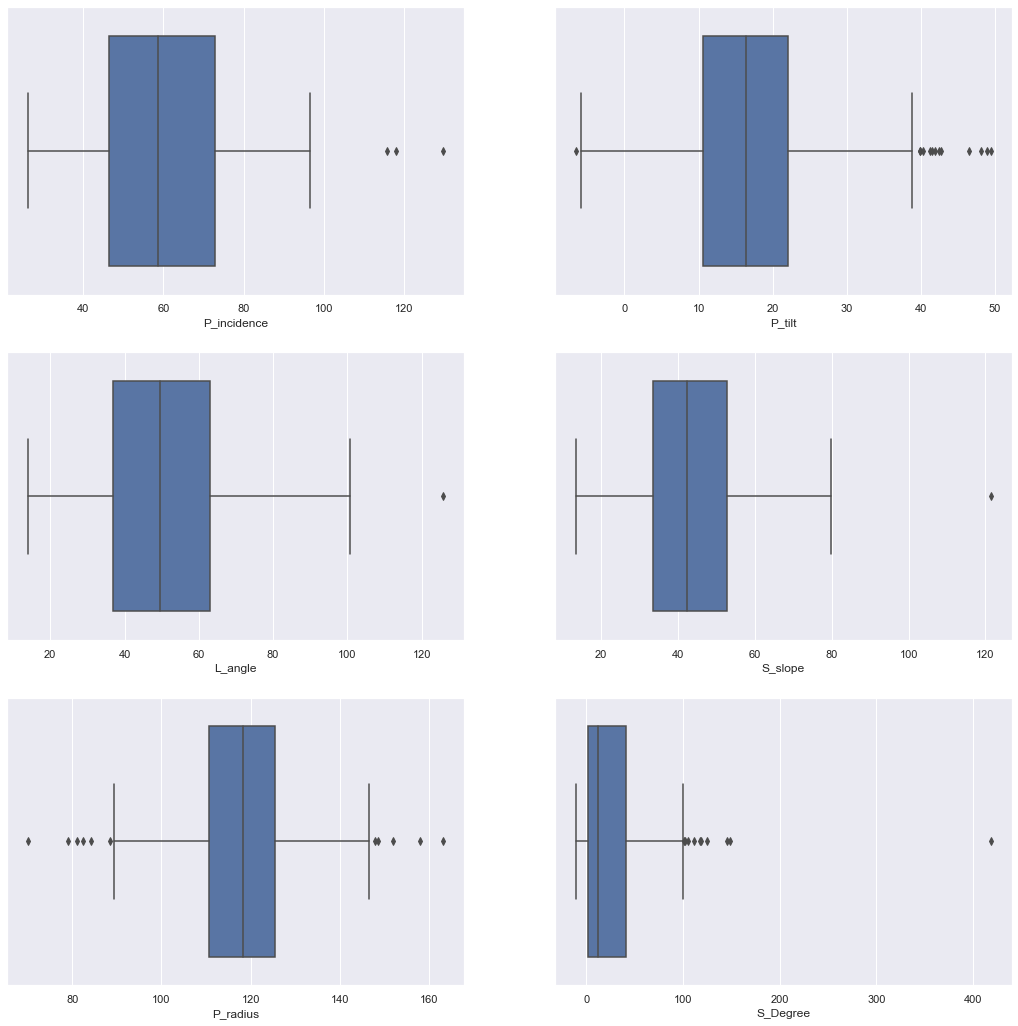

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['P_incidence',
 'P_tilt',
 'L_angle',
 'S_slope',
 'P_radius',
 'S_Degree']
len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.boxplot(df_spondylolisthesis[listOfColumns[index]],ax = ax[j][i]);      
            index = index + 1 
fig.show()

    As seen earlier, apart from S_Degree there are no other column which are having outliers.
    Lets add good complement to a box plot by view swarm plot for the data. Since we have less number of rows the swarm plot would help to visulaize the data.

In [17]:
listofcolumns = list(df_spondylolisthesis)
for indexOfList in  listofcolumns[0:-1]:
    quant25 = np.percentile(df_spondylolisthesis[indexOfList],25)
    quant75 = np.percentile(df_spondylolisthesis[indexOfList],75)
    Threshold=(quant75-quant25)*1.5
    lower=quant25-Threshold
    upper=quant75+Threshold
    Outliers=[i for i in df_spondylolisthesis[indexOfList] if i < lower or i > upper]
    print('{} Total Number of outliers in {} : {}'.format('\033[1m',indexOfList,len(Outliers)))

 Total Number of outliers in P_incidence : 3
 Total Number of outliers in P_tilt : 13
 Total Number of outliers in L_angle : 1
 Total Number of outliers in S_slope : 1
 Total Number of outliers in P_radius : 11
 Total Number of outliers in S_Degree : 10


##### Observation

**P_incidence** :: 
    
    There are 3 outliers seen in data.
    Data is normally distributed, with less outlier values.

**P_tilt** :: 
    
    There are few outliers on both negative and positive end.
    It is has little skewness towards right side
    
**L_angle** :: 

    Data is normally distributed, there is some skewness due to one outlier.

**S_slope** :: 

    Data is normally distributed, there is some skewness due to one outlier.    

**P_radius** :: 
    
    Here we see more outliers, there are about 11 outliers observed in data.

**S_Degree** :: 

    Right Skewed data is due to more outliers observed in data.
    There are about 10 outliers observed in data.
 
    Summary : S_Degree data seems to have outlier, and data is positively skewed distribution. P_incidence, P_tilt, L_angle, S_slope, P_radius - data distribution is normal. 
    

    Lets add complement to a box plot by view swarm plot for the data, with comparison on Class variable. Since we have less number of rows the swarm plot would help to visulaize the data. 

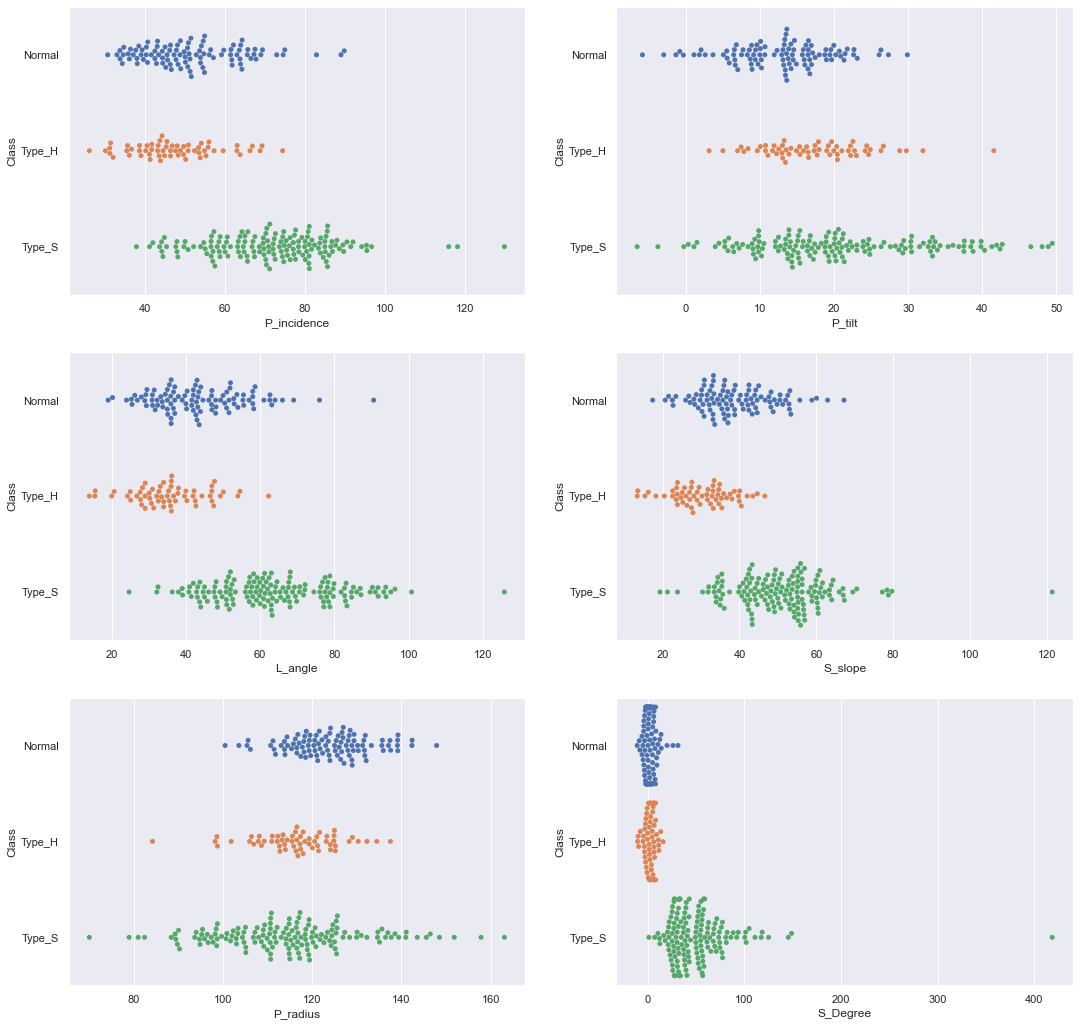

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['P_incidence',
 'P_tilt',
 'L_angle',
 'S_slope',
 'P_radius',
 'S_Degree']
len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.swarmplot(x=df_spondylolisthesis[listOfColumns[index]],y=df_spondylolisthesis['Class'],ax = ax[j][i]) 
            index = index + 1 
fig.show()



    Class "Type_S" has more range of spread of data as observed. Number of data points are more for Type_S.
    Class "Type_H" and "Normal" are having similar spread.
    Most of Outlier in dataset is from "Type_S" Class, to check on this further let's plot boxplot as well

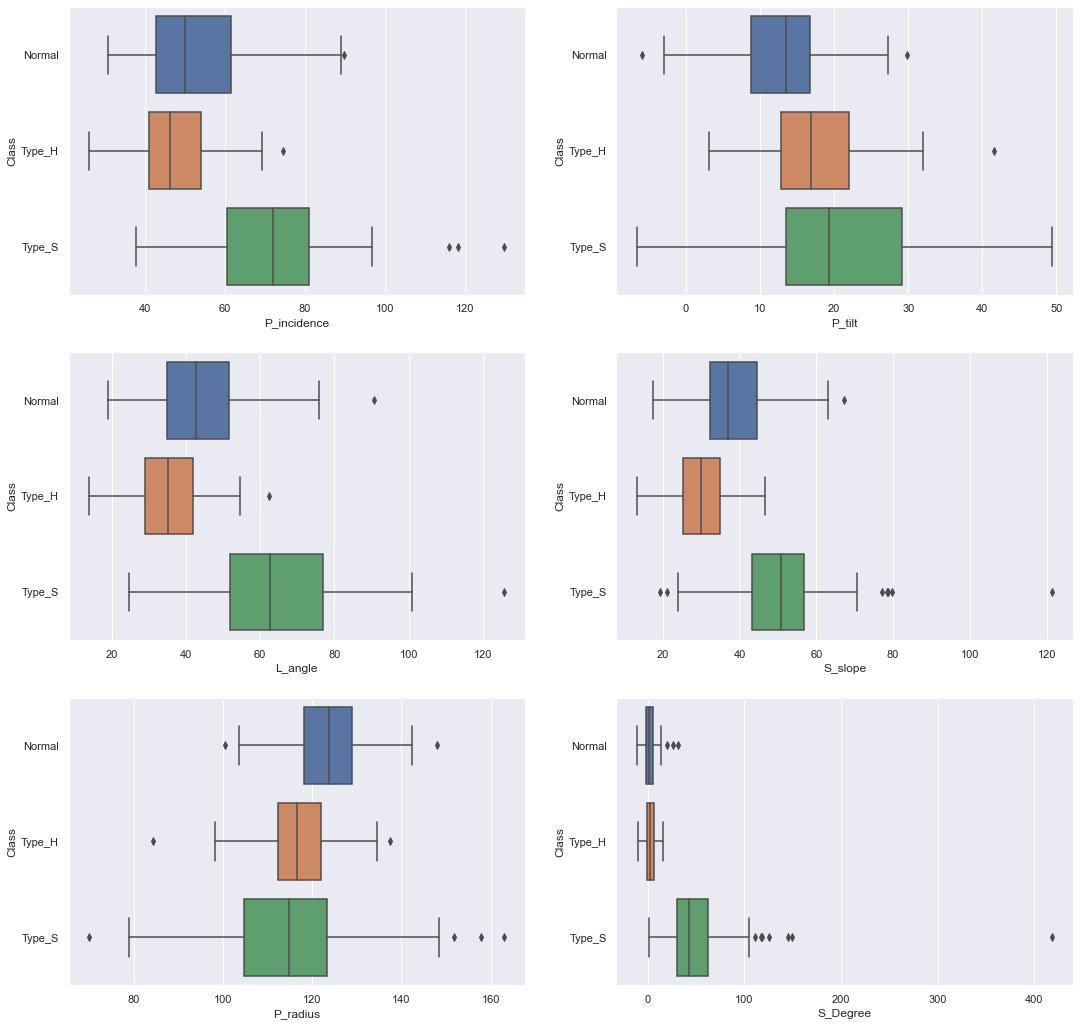

In [19]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['P_incidence',
 'P_tilt',
 'L_angle',
 'S_slope',
 'P_radius',
 'S_Degree']
len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.boxplot(x=df_spondylolisthesis[listOfColumns[index]],y=df_spondylolisthesis['Class'],ax = ax[j][i]) 
            index = index + 1 
fig.show()

**P_Incidence** : 
    
    Type_S Class is having larger distribution of data and there are outlier observed in this class.
    Normal class Value is slightly higher than Type_H class
  
    
**P_tilt** :
    
    There are no outliers observed in Type_S class. There are outliers observed in Other two classes.
 
**L_angle**
    
    We can see Normal class has higher values compared to type_H class
    Each class has outlier

**S_slope**

    Normal and Type S class has few outlier
    

**P_radius**

    Each class has few outlier
    Extreme values for Type_s class

**S_Degree**

    S_Degree has extreme values for type_S Class
    Distribution for Normal and type_H almost looks same. Here for these 2 classes (only) we cannot really see by initial analysis whether the S_degree plays significant role or not. 


    Type_S has wide range of data distribution in general.

In [20]:
df_spondylolisthesis.corr() 

P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000

    To get better view of data, lets draw heat map

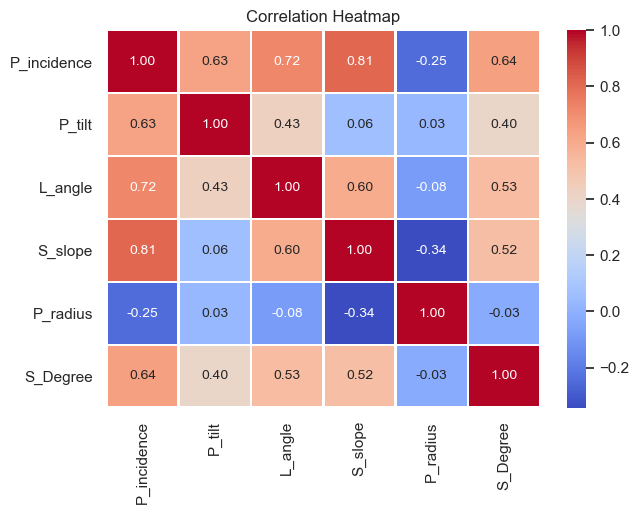

In [21]:
plt.figure(dpi = 100,figsize= (7,5))
sns.heatmap(df_spondylolisthesis.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

    The heat map clearly shows correlation between variables. As observed, this is having mix correlation of data.
    P_incidence is having good correlation to other variables - 'P_tilt',  'L_angle',  'S_slope' and 'S_Degree'.
    S_Degree and P_incidence is having high correlation.
    P_radius is having less correlation to other variables and negative correlation.

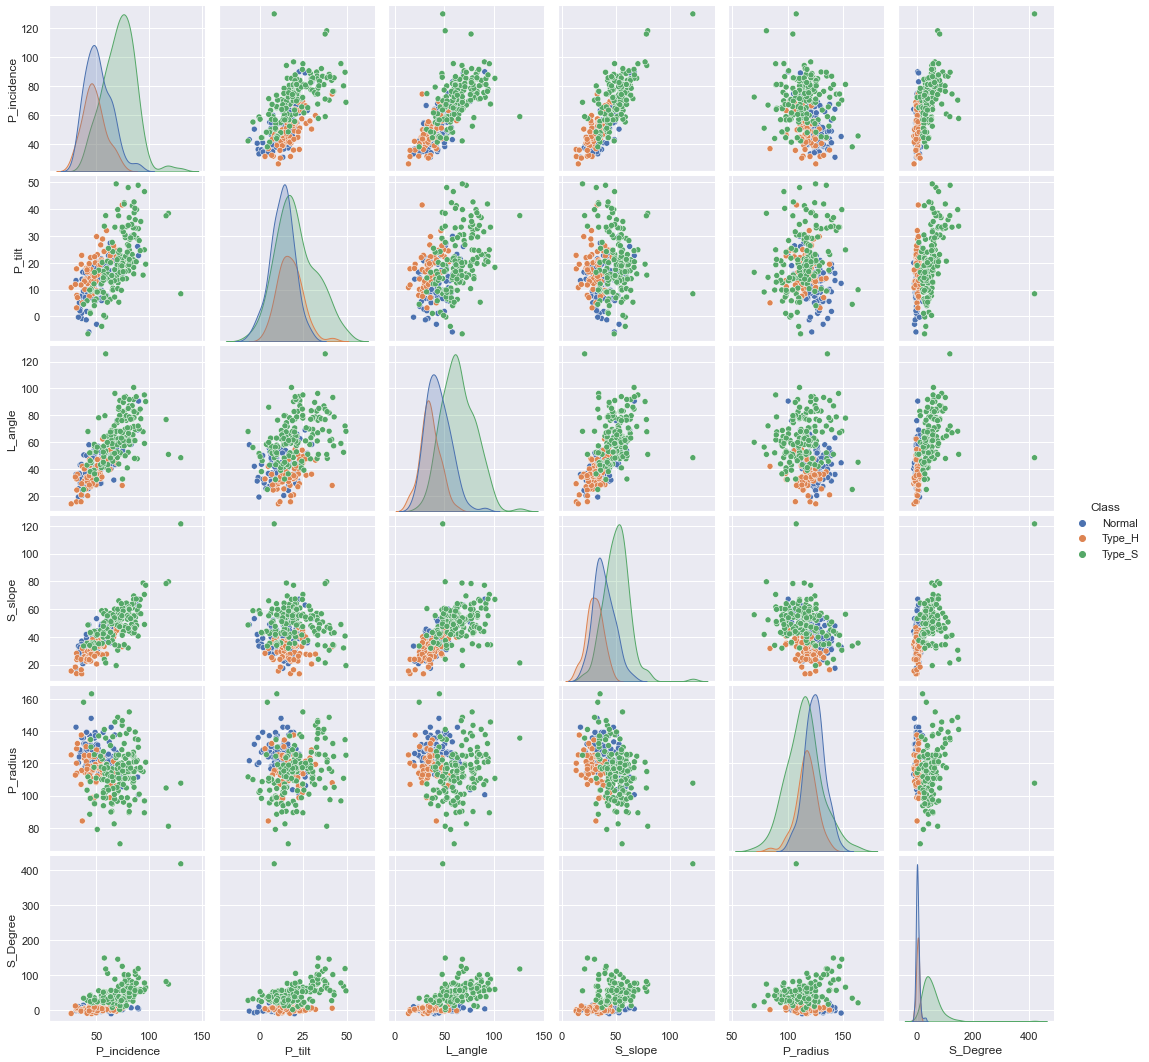

In [22]:
sns.pairplot(df_spondylolisthesis,diag_kind='kde',hue='Class');

    Class "Type_S" is generally having more spread of data when compared one variable with another.

    Clusters can be observed in the data set.
        Class "Type_S"  - Cluters can be observed for feature S_Degree v/s other feature in the dataset
                        - Cluters can be observed for feature P_incidence v/s other features
                        - Cluters can be observed for feature S_slope v/s other features
        Class "Type_H"  - Cluters can be observed for feature S_slope v/s other features
                        - Cluters can be observed for feature L_angle v/s other features
        Class "Normal"  - is having overall spread

    S_Degree may have more influence on the classification, while P_tilt seem to have lesser influence. 



   **relationship between variables** :: (this is well observed in heat map)
    
    P_incidence v/s P_tilt, L_angle, S_slope, S_Degree' are positively correlated.
    
    S_Degree is having  positively correlation (almost) to other variables.
    
    L_angle' and S_slope are having positively correlation.

    Checking class variable - "Normal"

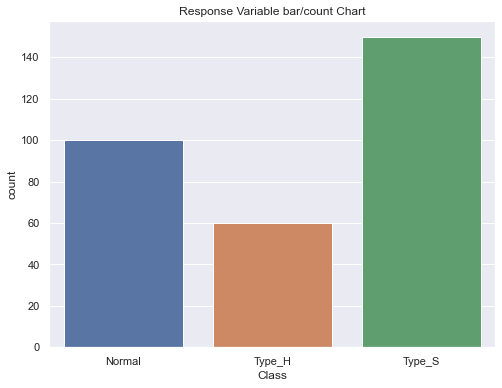

In [23]:
plt.figure(figsize=(8,6))
sns.countplot('Class',data=df_spondylolisthesis).set_title('Response Variable bar/count Chart')
plt.show()

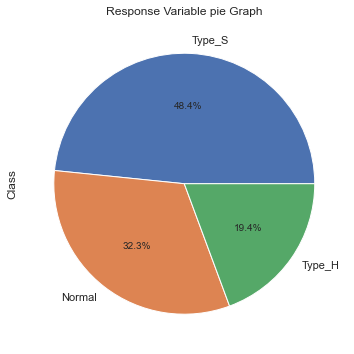

In [24]:
plt.figure(figsize=(8,6))
df_spondylolisthesis['Class'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Response Variable pie Graph')
plt.show()

    We may need outlier treatment, so lets Check mean values of each class for all independent variables

In [25]:
class_summary=df_spondylolisthesis.groupby('Class') 
class_summary.mean().reset_index()

Class  P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
0  Normal    51.685244  12.821414  43.542605  38.863830  123.890834   2.186572
1  Type_H    47.638407  17.398795  35.463524  30.239612  116.474968   2.480251
2  Type_S    71.514224  20.748038  64.110108  50.766186  114.518810  51.896687

#### Data pre-processing:
    Segregate predictors vs target attributes
    Perform normalisation or scaling if required.
    Check for target balancing. Add your comments.
    Perform train-test split.

In [26]:
#Use label encoder to convert categorical variables to one-hot encoding (dummy variables)
le=LabelEncoder()
df_spondylolisthesis['Class']=le.fit_transform(df_spondylolisthesis['Class'])

In [27]:
df_spondylolisthesis['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [28]:
df_spondylolisthesis['Class']=df_spondylolisthesis['Class'].astype('category') #changing datatype to category.

    Outlier treatment is done in below cell

In [29]:
list_of_df_col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

for i in range(5):
    for col in list_of_df_col:
        quant25 = np.percentile(df_spondylolisthesis[col],25)
        quant75 = np.percentile(df_spondylolisthesis[col],75)
        Threshold=(quant75-quant25)*1.5
        lower=quant25-Threshold
        upper=quant75+Threshold
     
        #Considering mean of a column, but here the values are between  lower and upper cutoff
        df_include = df_spondylolisthesis.loc[(df_spondylolisthesis[col] >= lower) & (df_spondylolisthesis[col] <= upper)]
        mean=int(df_include[col].mean())
       
        #imputing outliers with mean
        df_spondylolisthesis[col]=np.where(df_spondylolisthesis[col]>upper,mean,df_spondylolisthesis[col])
        df_spondylolisthesis[col]=np.where(df_spondylolisthesis[col]<lower,mean,df_spondylolisthesis[col])


In [30]:
df_spondylolisthesis.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     59.893743   16.060995   51.689825   42.697607  118.335308   21.474538
std      16.139975    7.397731   18.071145   12.656481   10.515370   24.167936
min      26.147921   -2.970024   14.000000   13.366931   93.692209  -11.058179
25%      46.430294   10.839352   37.000000   33.347122  111.974906    1.603727
50%      58.691038   16.000000   49.562398   42.349084  118.000000   11.767934
75%      72.313279   20.338937   62.964777   52.475365  125.127803   37.277675
max      96.657315   34.310989  100.744220   79.695154  143.560690   88.301486

    As seen in above table, there are no outliers observed. Lets check it using numbers

In [31]:
listofcolumns = list(df_spondylolisthesis)
for ind in  listofcolumns[0:-1]:
    quant25 = np.percentile(df_spondylolisthesis[ind],25)
    quant75 = np.percentile(df_spondylolisthesis[ind],75)
    Threshold=(quant75-quant25)*1.5
    lower=quant25-Threshold
    upper=quant75+Threshold
    Outliers=[i for i in df_spondylolisthesis[ind] if i < lower or i > upper]
    print('{} Total Number of outliers in {} : {}'.format('\033[1m',ind,len(Outliers)))

 Total Number of outliers in P_incidence : 0
 Total Number of outliers in P_tilt : 0
 Total Number of outliers in L_angle : 0
 Total Number of outliers in S_slope : 0
 Total Number of outliers in P_radius : 0
 Total Number of outliers in S_Degree : 0


In [32]:
#Segregate features and class variables
x_data = df_spondylolisthesis[['P_incidence',
 'P_tilt',
 'L_angle',
 'S_slope',
 'P_radius',
 'S_Degree']]
y_data = df_spondylolisthesis['Class']

In [33]:
x_data

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree
0      38.505273  16.964297  35.112814  21.540976  127.632875   7.986683
1      54.920858  18.968430  51.601455  35.952428  125.846646   2.001642
2      44.362490   8.945435  46.902096  35.417055  129.220682   4.994195
3      48.318931  17.452121  48.000000  30.866809  128.980308  -0.910941
4      45.701789  10.659859  42.577846  35.041929  130.178314  -3.388910
..           ...        ...        ...        ...         ...        ...
305    80.111572  33.942432  85.101608  46.169139  125.593624  21.000000
306    95.480229  16.000000  59.000000  48.930176   96.683903  77.283072
307    74.094731  18.823727  76.032156  55.271004  128.405731  73.388216
308    87.679087  20.365613  93.822416  67.313473  120.944829  76.730629
309    48.259920  16.417462  36.329137  31.842457   94.882336  28.343799

[310 rows x 6 columns]

    Generally any distance based algorithm, it is recommended to scale the data.

In [34]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(x_data))
X_std.columns = x_data.columns

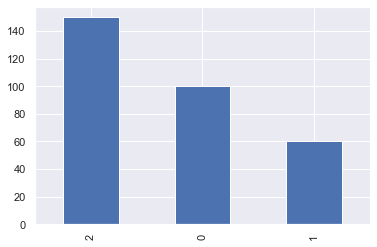

In [35]:
#Check for target balancing. 
y_data.value_counts().plot(kind="bar");

    classes in Y (y_data) variable are not balanced, 
    Here observations belonging to one class is lower than those belonging to the other classes.
    Some times algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets.
    Since data is not significantly imbalanced, we can use the dataset as is.

In [36]:
#split the dataset into training and test datasets
# Transform data into features and target
X = np.array(X_std) 
y = np.array(y_data)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

        lets check the shape of the train and test dataset.

#### Model training, testing and tuning:
     Design and train a KNN classifier.
     Display the classification accuracies for train and test data.
     Display and explain the classification report in detail.
     Automate the task of finding best values of K for KNN.
     
     Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained 
     model with your comments for selecting this model. 

In [37]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean')

# fitting the model
knn.fit(X_train, y_train)


y_pred_train = knn.predict(X_train)
# predict the response
y_pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train, y_pred_train)
print('train Accuracy: ',np.round(train_accuracy,4))

# print classification report
print("classification report for train")
print(classification_report(y_train, y_pred_train))

train Accuracy:  0.8848
classification report for train
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        72
           1       0.79      0.79      0.79        42
           2       0.96      0.93      0.95       103

    accuracy                           0.88       217
   macro avg       0.86      0.86      0.86       217
weighted avg       0.89      0.88      0.89       217



    This model is having good accuracy of 0.88 for train data
    precision and recall high score for all classes which signifies that miscalssification in terms of telling patient who is having decease as not having is less and also chances of telling patient that he is not having a decease as having is less.

In [39]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_test, y_pred)
print('train Accuracy: ',np.round(train_accuracy,4))

# print classification report
print("classification report for train")
print(classification_report(y_test, y_pred))

train Accuracy:  0.8065
classification report for train
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.58      0.78      0.67        18
           2       0.98      0.89      0.93        47

    accuracy                           0.81        93
   macro avg       0.76      0.78      0.77        93
weighted avg       0.83      0.81      0.81        93



    This model is having good accuracy of 0.80 for test data
    precision and recall high score for all classes which signifies that miscalssification in terms of telling patient who is having decease as not having is less and also chances of telling patient that he is not having a decease as having is less.

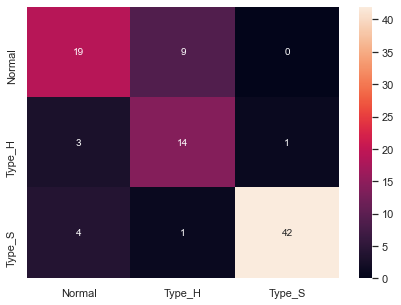

In [40]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

    The number 3, 4, 1 which are in lower part of diagnol showing less number which signifies that misclassification in terms of saying a person having decease as not having is less.

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[3,5,7],
          'leaf_size':[1,3,5,7],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1],
          'p':[1,2,3,4]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
# print(recall_score(y_test, prediction))
#evaluation(Confusion Metrix)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
Accuracy: 0.7741935483870968


    Best model can be got by using above mentioned parameter.

In [42]:
# subsetting just the odd ones, it is best to set number of neighbours to odd numbers
# neighbors = list(filter(lambda x: x % 2 != 0, list(range(1,20))))
neighbors = list(range(1, 50, 2))

# empty list that will hold accuracy scores which will hold the required accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 5


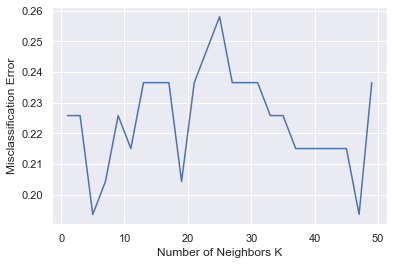

In [43]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

    MSE is lowest for k = 5, which also signifies the value of k to be used in the model.

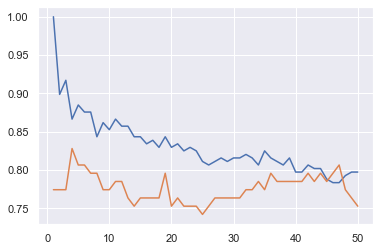

In [44]:
train_score=[]
test_score=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))
    
plt.plot(range(1,51),train_score)
plt.plot(range(1,51),test_score)
plt.show()

    As seen in above graph, the test data accuracy is never below .70 for k upto 50

The optimal number of neighbors is 11


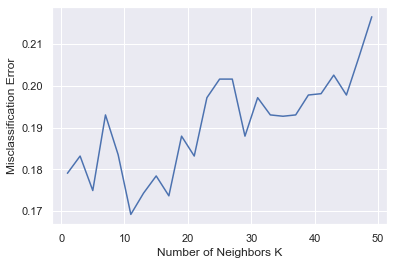

In [46]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=15, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()


    With Cross validation we are getting best K value as 11

#### Conclusion and improvisation:
    • Write your conclusion on the results.
    • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points 
    collected by the research team to perform a better data analysis in future.

**Conclusion**:

    For the classification/prediction of patient, this model is suitable when used with k value as 5.
    This model is having good accuracy of 0.80 for test data
    precision and recall high score for all classes which signifies that miscalssification in terms of telling patient who is having decease as not having is less and also chances of telling patient that he is not having a decease as having is less.

**Improvement**:
    Patient history can also be collected for improvising model. Other common diseases like diabetes, blood pressure can also be obtained to have better prediction in the model.


## Project 2

**DOMAIN**: Banking and finance
    
**CONTEXT**: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee 
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the 
borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an 
average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing 
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit 
with same budget as per last campaign. 

**DATA DESCRIPTION**: 
    
The data consists of the following attributes: 
1. **ID**: Customer ID
2. **Age**: Customer’s approximate age.
3. **CustomerSince**: Customer of the bank since. [unit is masked]
4. **HighestSpend**: Customer’s highest spend so far in one transaction. [unit is masked]
5. **ZipCode**: Customer’s zip code.
6. **HiddenScore**: A score associated to the customer which is masked by the bank as an IP.
7. **MonthlyAverageSpend**: Customer’s monthly average spend so far. [unit is masked]
8. **Level**: A level associated to the customer which is masked by the bank as an IP.
9. **Mortgage**: Customer’s mortgage. [unit is masked]
10. **Security**: Customer’s security asset with the bank. [unit is masked]
11. **FixedDepositAccount**: Customer’s fixed deposit account with the bank. [unit is masked]
12. **InternetBanking**: if the customer uses internet banking.
13. **CreditCard**: if the customer uses bank’s credit card.
14. **LoanOnCard**: if the customer has a loan on credit card.

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test dataset

from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = None

**Import and warehouse data**:

    Import all the given datasets and explore shape and size of each.
    Merge all datasets onto one and explore final shape and size

In [2]:
#Importing dataset
part1BAFDf = pd.read_csv("./Part2 - Data1.csv")
part2BAFDf = pd.read_csv("./Part2 -Data2.csv")

In [3]:
#Checking shape and size of dataset
print("size of ./Part2 - Data1.csv",part1BAFDf.size)
print("Number of rows in ./Part2 - Data1.csv",part1BAFDf.shape[0], "Number of columns in ./Part2 - Data1.csv",part1BAFDf.shape[1])
print("Number of rows in ./Part2 - Data1.csv",part2BAFDf.shape[0], "Number of columns in ./Part2 - Data1.csv",part2BAFDf.shape[1])

size of ./Part2 - Data1.csv 40000
Number of rows in ./Part2 - Data1.csv 5000 Number of columns in ./Part2 - Data1.csv 8
Number of rows in ./Part2 - Data1.csv 5000 Number of columns in ./Part2 - Data1.csv 7


In [4]:
#merging all dataset
banking_Finance_dataset_Raw = pd.merge(part1BAFDf, part2BAFDf, how ='inner', on ='ID')

In [64]:
#creating a copy of dataset - which could be useful in EDA
banking_Finance_dataset = banking_Finance_dataset_Raw.copy()

In [65]:
print("size of final data set :: " , banking_Finance_dataset.size)
print("No of rows in final data set :: " , banking_Finance_dataset.shape[0])
print("No of columns in final data set :: " , banking_Finance_dataset.shape[1])

size of final data set ::  70000
No of rows in final data set ::  5000
No of columns in final data set ::  14


    After merging two dataset - we get 14 column dataset and dataset is having 5000 rows

**Data cleansing**:
    
    Explore and if required correct the datatypes of each attribute.    
    Explore for null values in the attributes and if required drop or impute values.

In [66]:
banking_Finance_dataset.sample(10)

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
4642  4643   65             40           143    95616            4   
1897  1898   54             29            98    93065            1   
4839  4840   34              8            52    95060            4   
2465  2466   58             34            25    90059            2   
3613  3614   35             11           148    92672            1   
4698  4699   48             22           162    94143            3   
2650  2651   64             40            52    95060            2   
4439  4440   33              7           104    94542            2   
467    468   45             20            39    90232            1   
3798  3799   55             25            35    93943            3   

      MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
4642                 6.60      2         0         0                    0   
1897                 0.10      3         0         0                    0   
4839                 0.20      1         0         0                    0   
2465                 0.30      1       123         0                    0   
3613                 5.80      3         0         0                    0   
4698                 1.40      1       400         0                    0   
2650                 1.10      1       226         0                    0   
4439                 3.60      3         0         0                    0   
467                  2.40      1         0         0                    0   
3798                 1.00      3       144         0                    0   

      InternetBanking  CreditCard  LoanOnCard  
4642                1           0        1.00  
1897                0           0        0.00  
4839                1           0        0.00  
2465                1           0        0.00  
3613                1           0        1.00  
4698                0           0        1.00  
2650                0           0        0.00  
4439                0           1        1.00  
467                 0           1        0.00  
3798                1           1        0.00

In [67]:
banking_Finance_dataset.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [68]:
banking_Finance_dataset.describe()

ID     Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
count 5000.00 5000.00        5000.00       5000.00  5000.00      5000.00   
mean  2500.50   45.34          20.10         73.77 93152.50         2.40   
std   1443.52   11.46          11.47         46.03  2121.85         1.15   
min      1.00   23.00          -3.00          8.00  9307.00         1.00   
25%   1250.75   35.00          10.00         39.00 91911.00         1.00   
50%   2500.50   45.00          20.00         64.00 93437.00         2.00   
75%   3750.25   55.00          30.00         98.00 94608.00         3.00   
max   5000.00   67.00          43.00        224.00 96651.00         4.00   

       MonthlyAverageSpend   Level  Mortgage  Security  FixedDepositAccount  \
count              5000.00 5000.00   5000.00   5000.00              5000.00   
mean                  1.94    1.88     56.50      0.10                 0.06   
std                   1.75    0.84    101.71      0.31                 0.24   
min                   0.00    1.00      0.00      0.00                 0.00   
25%                   0.70    1.00      0.00      0.00                 0.00   
50%                   1.50    2.00      0.00      0.00                 0.00   
75%                   2.50    3.00    101.00      0.00                 0.00   
max                  10.00    3.00    635.00      1.00                 1.00   

       InternetBanking  CreditCard  LoanOnCard  
count          5000.00     5000.00     4980.00  
mean              0.60        0.29        0.10  
std               0.49        0.46        0.30  
min               0.00        0.00        0.00  
25%               0.00        0.00        0.00  
50%               1.00        0.00        0.00  
75%               1.00        1.00        0.00  
max               1.00        1.00        1.00

In [69]:
banking_Finance_dataset.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

    LoanOnCard is of float data type. This we can change it to categorical data type.
    By looking at sample data and it's description, there are few categorical variable which are having int or float datatype.
    Lets take closer look at Level, Security, FixedDepositAccount, InternetBanking, CreditCard variables

In [70]:
for i in ['HiddenScore','Level' , 'Security' , 'FixedDepositAccount' , 'InternetBanking'  , 'CreditCard' , 'LoanOnCard']:
    print(i , banking_Finance_dataset[i].unique());
    print(i , len(banking_Finance_dataset[i].unique()));

HiddenScore [4 3 1 2]
HiddenScore 4
Level [1 2 3]
Level 3
Security [1 0]
Security 2
FixedDepositAccount [0 1]
FixedDepositAccount 2
InternetBanking [0 1]
InternetBanking 2
CreditCard [0 1]
CreditCard 2
LoanOnCard [nan  1.  0.]
LoanOnCard 3


    The above variables looks like category variables. So let's convert it.

In [71]:
for i in ['HiddenScore','Level' , 'Security' , 'FixedDepositAccount' , 'InternetBanking'  , 'CreditCard' , 'LoanOnCard']:
    banking_Finance_dataset[i]=banking_Finance_dataset[i].astype('category') #changing datatype to category.

In [72]:
banking_Finance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 507.4 KB


    Check for any null values in the dataset, remove if available

In [73]:
banking_Finance_dataset.isnull().values.any() # If there are any null values in data set

True

In [74]:
banking_Finance_dataset.isnull().values.sum()

20

In [75]:
banking_Finance_dataset = banking_Finance_dataset.dropna(axis = 0, how ='any')

In [77]:
banking_Finance_dataset.isnull().values.sum()

0

In [82]:
#check final count in the dataset
print("number of records after removing outlier" ,banking_Finance_dataset.shape)

number of records after removing outlier (4980, 14)


    Class variable analysis is done below

In [83]:
banking_Finance_dataset['LoanOnCard'].unique()

[1.00, 0.00]
Categories (2, float64): [1.00, 0.00]

In [85]:
banking_Finance_dataset['LoanOnCard'].value_counts(normalize=True)

0.0   0.90
1.0   0.10
Name: LoanOnCard, dtype: float64

    There is imbalance in the class variable, lets check the same by ploting and adding hue to it on credit card.
    This is specifically being done to check affect of CreditCard variable on LoanOnCard

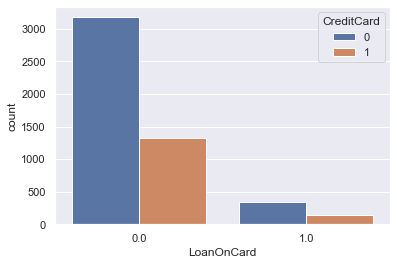

In [87]:
ax = sns.countplot(x="LoanOnCard", hue="CreditCard", data=banking_Finance_dataset)

    People having credit card and not having creditcard have got loans. so we need to check correlation between variables to decide whether to retain this variable for model building.

#### Data analysis & visualisation:

    Perform detailed statistical analysis on the data.
    Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

In [88]:
banking_Finance_dataset.describe()

ID     Age  CustomerSince  HighestSpend  ZipCode  \
count 4980.00 4980.00        4980.00       4980.00  4980.00   
mean  2510.35   45.35          20.12         73.85 93152.42   
std   1438.01   11.46          11.47         46.07  2123.66   
min     10.00   23.00          -3.00          8.00  9307.00   
25%   1265.75   35.00          10.00         39.00 91911.00   
50%   2510.50   45.00          20.00         64.00 93407.00   
75%   3755.25   55.00          30.00         98.00 94608.00   
max   5000.00   67.00          43.00        224.00 96651.00   

       MonthlyAverageSpend  Mortgage  
count              4980.00   4980.00  
mean                  1.94     56.59  
std                   1.75    101.84  
min                   0.00      0.00  
25%                   0.70      0.00  
50%                   1.50      0.00  
75%                   2.52    101.00  
max                  10.00    635.00

    Above table provides some basic statistical details like percentile, mean, std etc. of a data.
    All Feature variables are with numerical data.
    
    Observation on each column are mentioned below
**ID**:

    column is of no signiifcane and hence can be dropped while building model
    
**Age**:
    
    This column depicts age of customer. we need to check correlation between this variable and class variable.
    max age which is observed is 67
    average age of in dataset is 45
    
**CustomerSince**:

    75% of data are below 30, which signifies 75% of customers in bank are having less than 30 years of relationship
    
**HighestSpend**:
        
    75% of values are below 98, difference between max and 75% is high, there could be possible outliers in this variable, we need to check the column using boxplot.

**ZipCode**:
    
    This column signifies area code of customer, we need to check correlation between this variable and class variable.
    
**HiddenScore**:

    The values in this variable seems to be normally disteributed, mean is higher than median value which signifies skewness in data. If the mean is greater than the mode, the distribution is positively skewed. 
    
**MonthlyAverageSpend**:

    There is difference between max and 75% which signifies it may have outliers.
    
**Mortgage**:

    There is difference between max and 75% which signifies it may have outliers.

In [89]:
banking_Finance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   category
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   category
 8   Mortgage             4980 non-null   int64   
 9   Security             4980 non-null   category
 10  FixedDepositAccount  4980 non-null   category
 11  InternetBanking      4980 non-null   category
 12  CreditCard           4980 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 506.1 KB


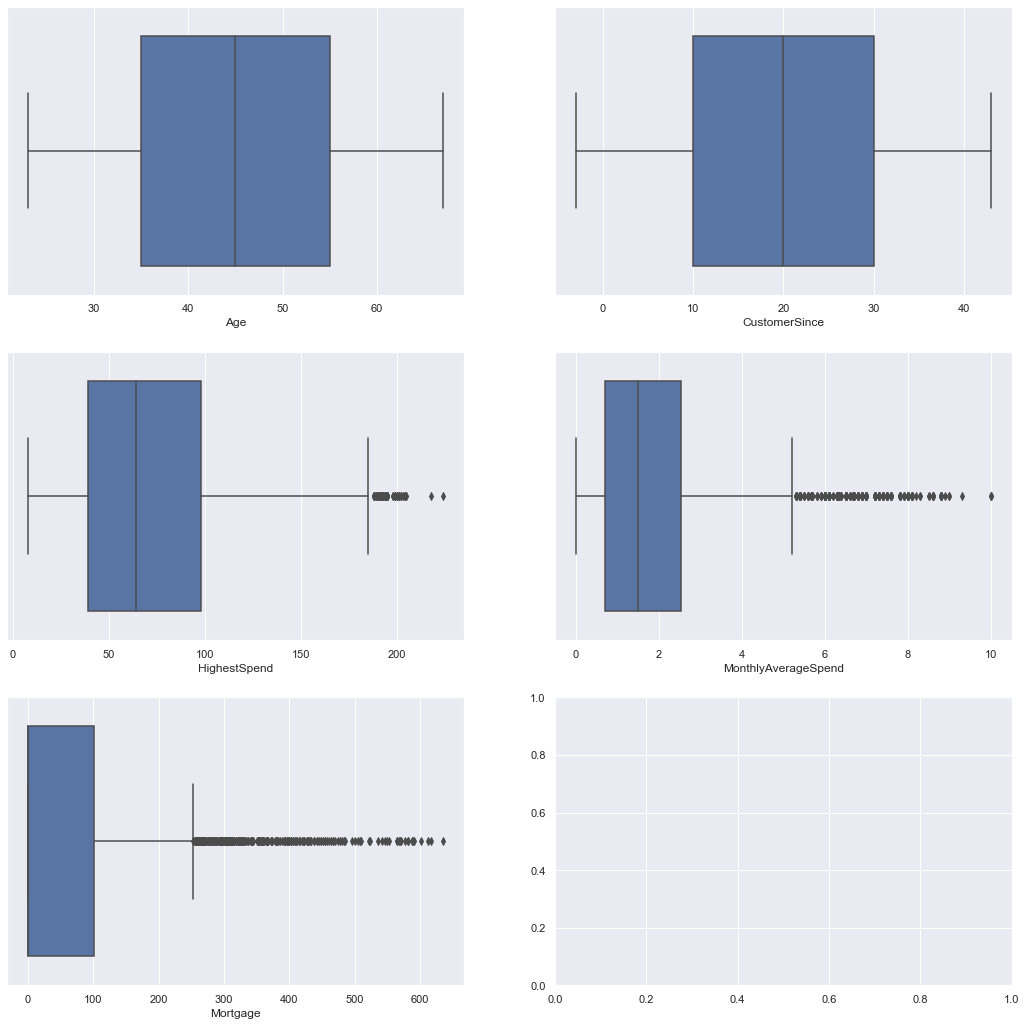

In [90]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['Age',
 'CustomerSince',
 'HighestSpend',
 'MonthlyAverageSpend',
 'Mortgage']
len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.boxplot(banking_Finance_dataset[listOfColumns[index]],ax = ax[j][i]);      
            #ax[j][i] = sns.violinplot(concatenated_df[listOfColumns[index]],ax = ax[j][i]);      
            index = index + 1 
fig.show()

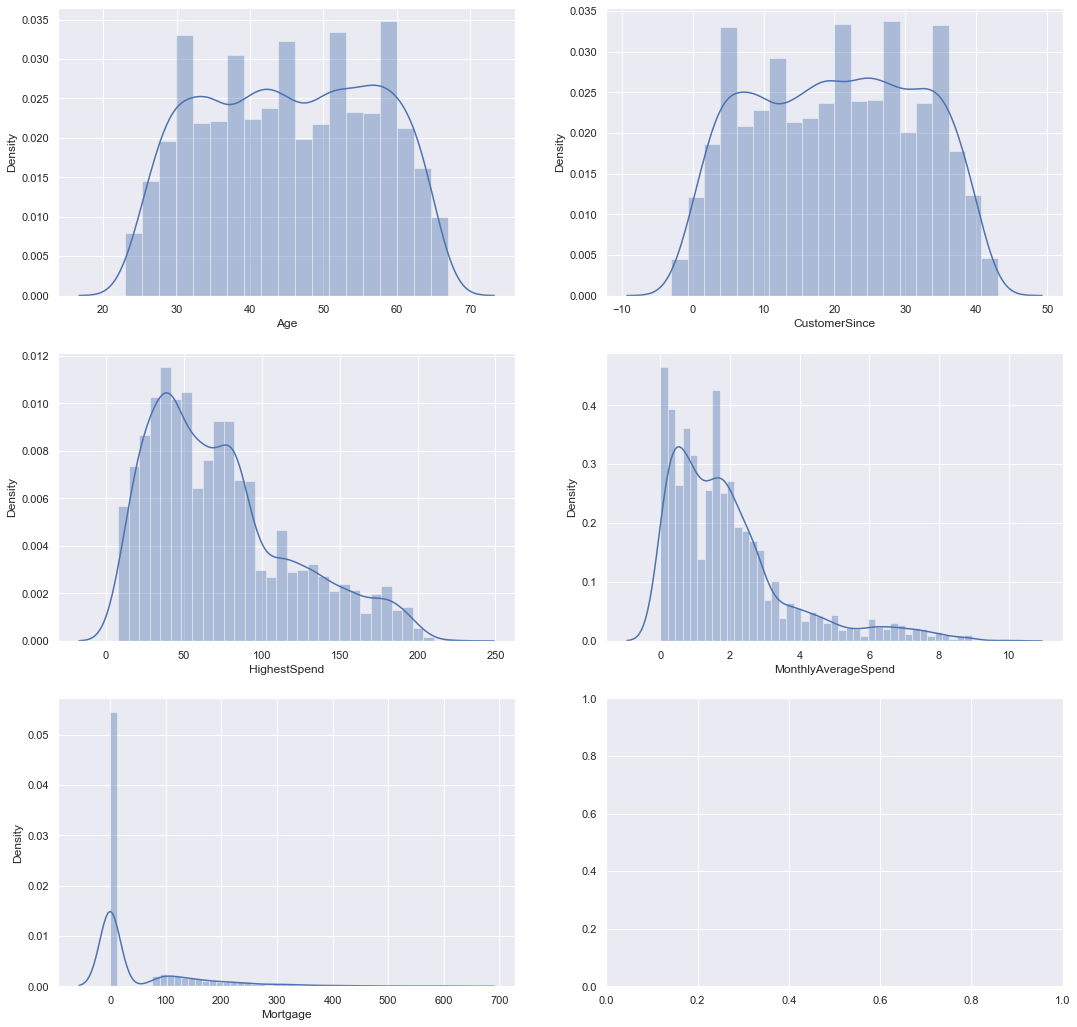

In [91]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['Age',
 'CustomerSince',
 'HighestSpend',
 'MonthlyAverageSpend',
 'Mortgage']
len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.distplot(banking_Finance_dataset[listOfColumns[index]],ax = ax[j][i]);      
            #ax[j][i] = sns.violinplot(concatenated_df[listOfColumns[index]],ax = ax[j][i]);      
            index = index + 1 
fig.show()

    Boxplot and distplot helps us in visualizing data distribution and outlier detection.
    For these plots we only consider continous variable present in this dataset.

**Age** ::
    
    The data seems to be normally distribution with no outliers. There are fews modes of data observed in the graph

**CustomerSince** ::
    
    This variable data behaviour is similar to that of age variable, it is better to see the correlation between these 2 variables.

**HighestSpend** ::

    There is right skew in data, with few outliers.

**MonthlyAverageSpend** ::

    There is right skew in data, with more outliers. HighestSpend and MonthlyAverageSpend tends to follow same kind of data distribution. These variable may have more correaltion. 

**Mortgage** ::

    There are more people with no mortage, and for other who have mortage, the data seems to be right skewed.

In [92]:
listofcolumns = ['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage']
for ind in  listofcolumns:
    quant25 = np.percentile(banking_Finance_dataset[ind],25)
    quant75 = np.percentile(banking_Finance_dataset[ind],75)
    Threshold=(quant75-quant25)*1.5
    lower=quant25-Threshold
    upper=quant75+Threshold
    Outliers=[i for i in banking_Finance_dataset[ind] if i < lower or i > upper]
    print('{} Total Number of outliers in {} : {}'.format('\033[1m',ind,len(Outliers)))

 Total Number of outliers in Age : 0
 Total Number of outliers in CustomerSince : 0
 Total Number of outliers in HighestSpend : 96
 Total Number of outliers in MonthlyAverageSpend : 324
 Total Number of outliers in Mortgage : 291


    We can perform bivariate analysis on variables and check the influence on the Class variable

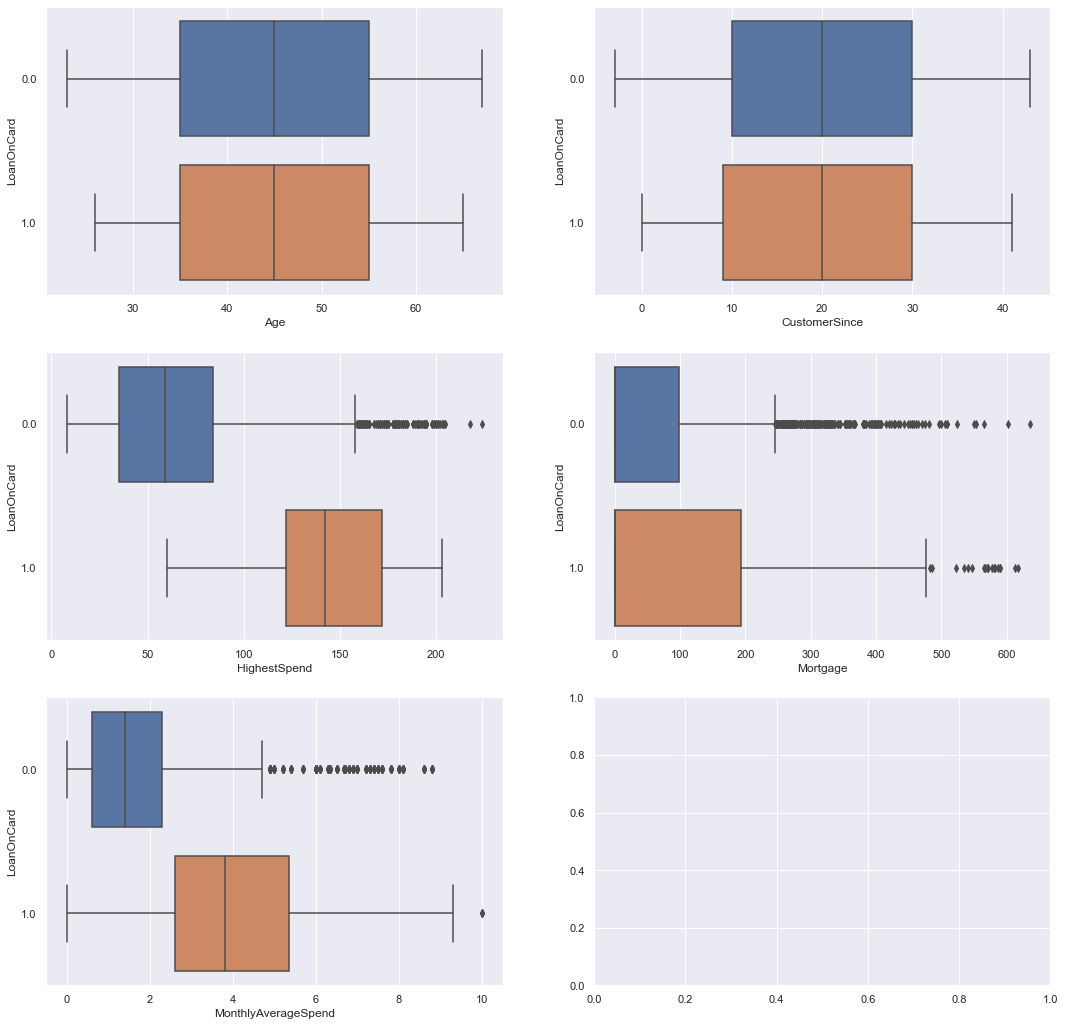

In [94]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(3,2, figsize=(18,18))
listOfColumns = ['Age', 'CustomerSince',
 'HighestSpend','Mortgage',
 'MonthlyAverageSpend']
len_listOfColumns = len(listOfColumns)
index = 0

for j in range(len(ax)):
    for i in range(len(ax[j])):
        if(index < len_listOfColumns):
            ax[j][i] = sns.boxplot(x=banking_Finance_dataset[listOfColumns[index]],y=banking_Finance_dataset['LoanOnCard'],ax = ax[j][i]) 
            index = index + 1 
fig.show()




    Age and CustomerSince variable are not having any outlier for either class variable.
    HighestSpend has outlier for "0" class and none for other class
    Mortgage - few customer may have mortgage, where many may not have it at all. Even though outliers are observed, we can take a deep look into it to decide on outliers in this column.
    MonthlyAverageSpend - has outlier for "0" class and only one for other class.
    
    For all of these variable, it is better to have deep look into the data and take value counts of same to decide on outlier.

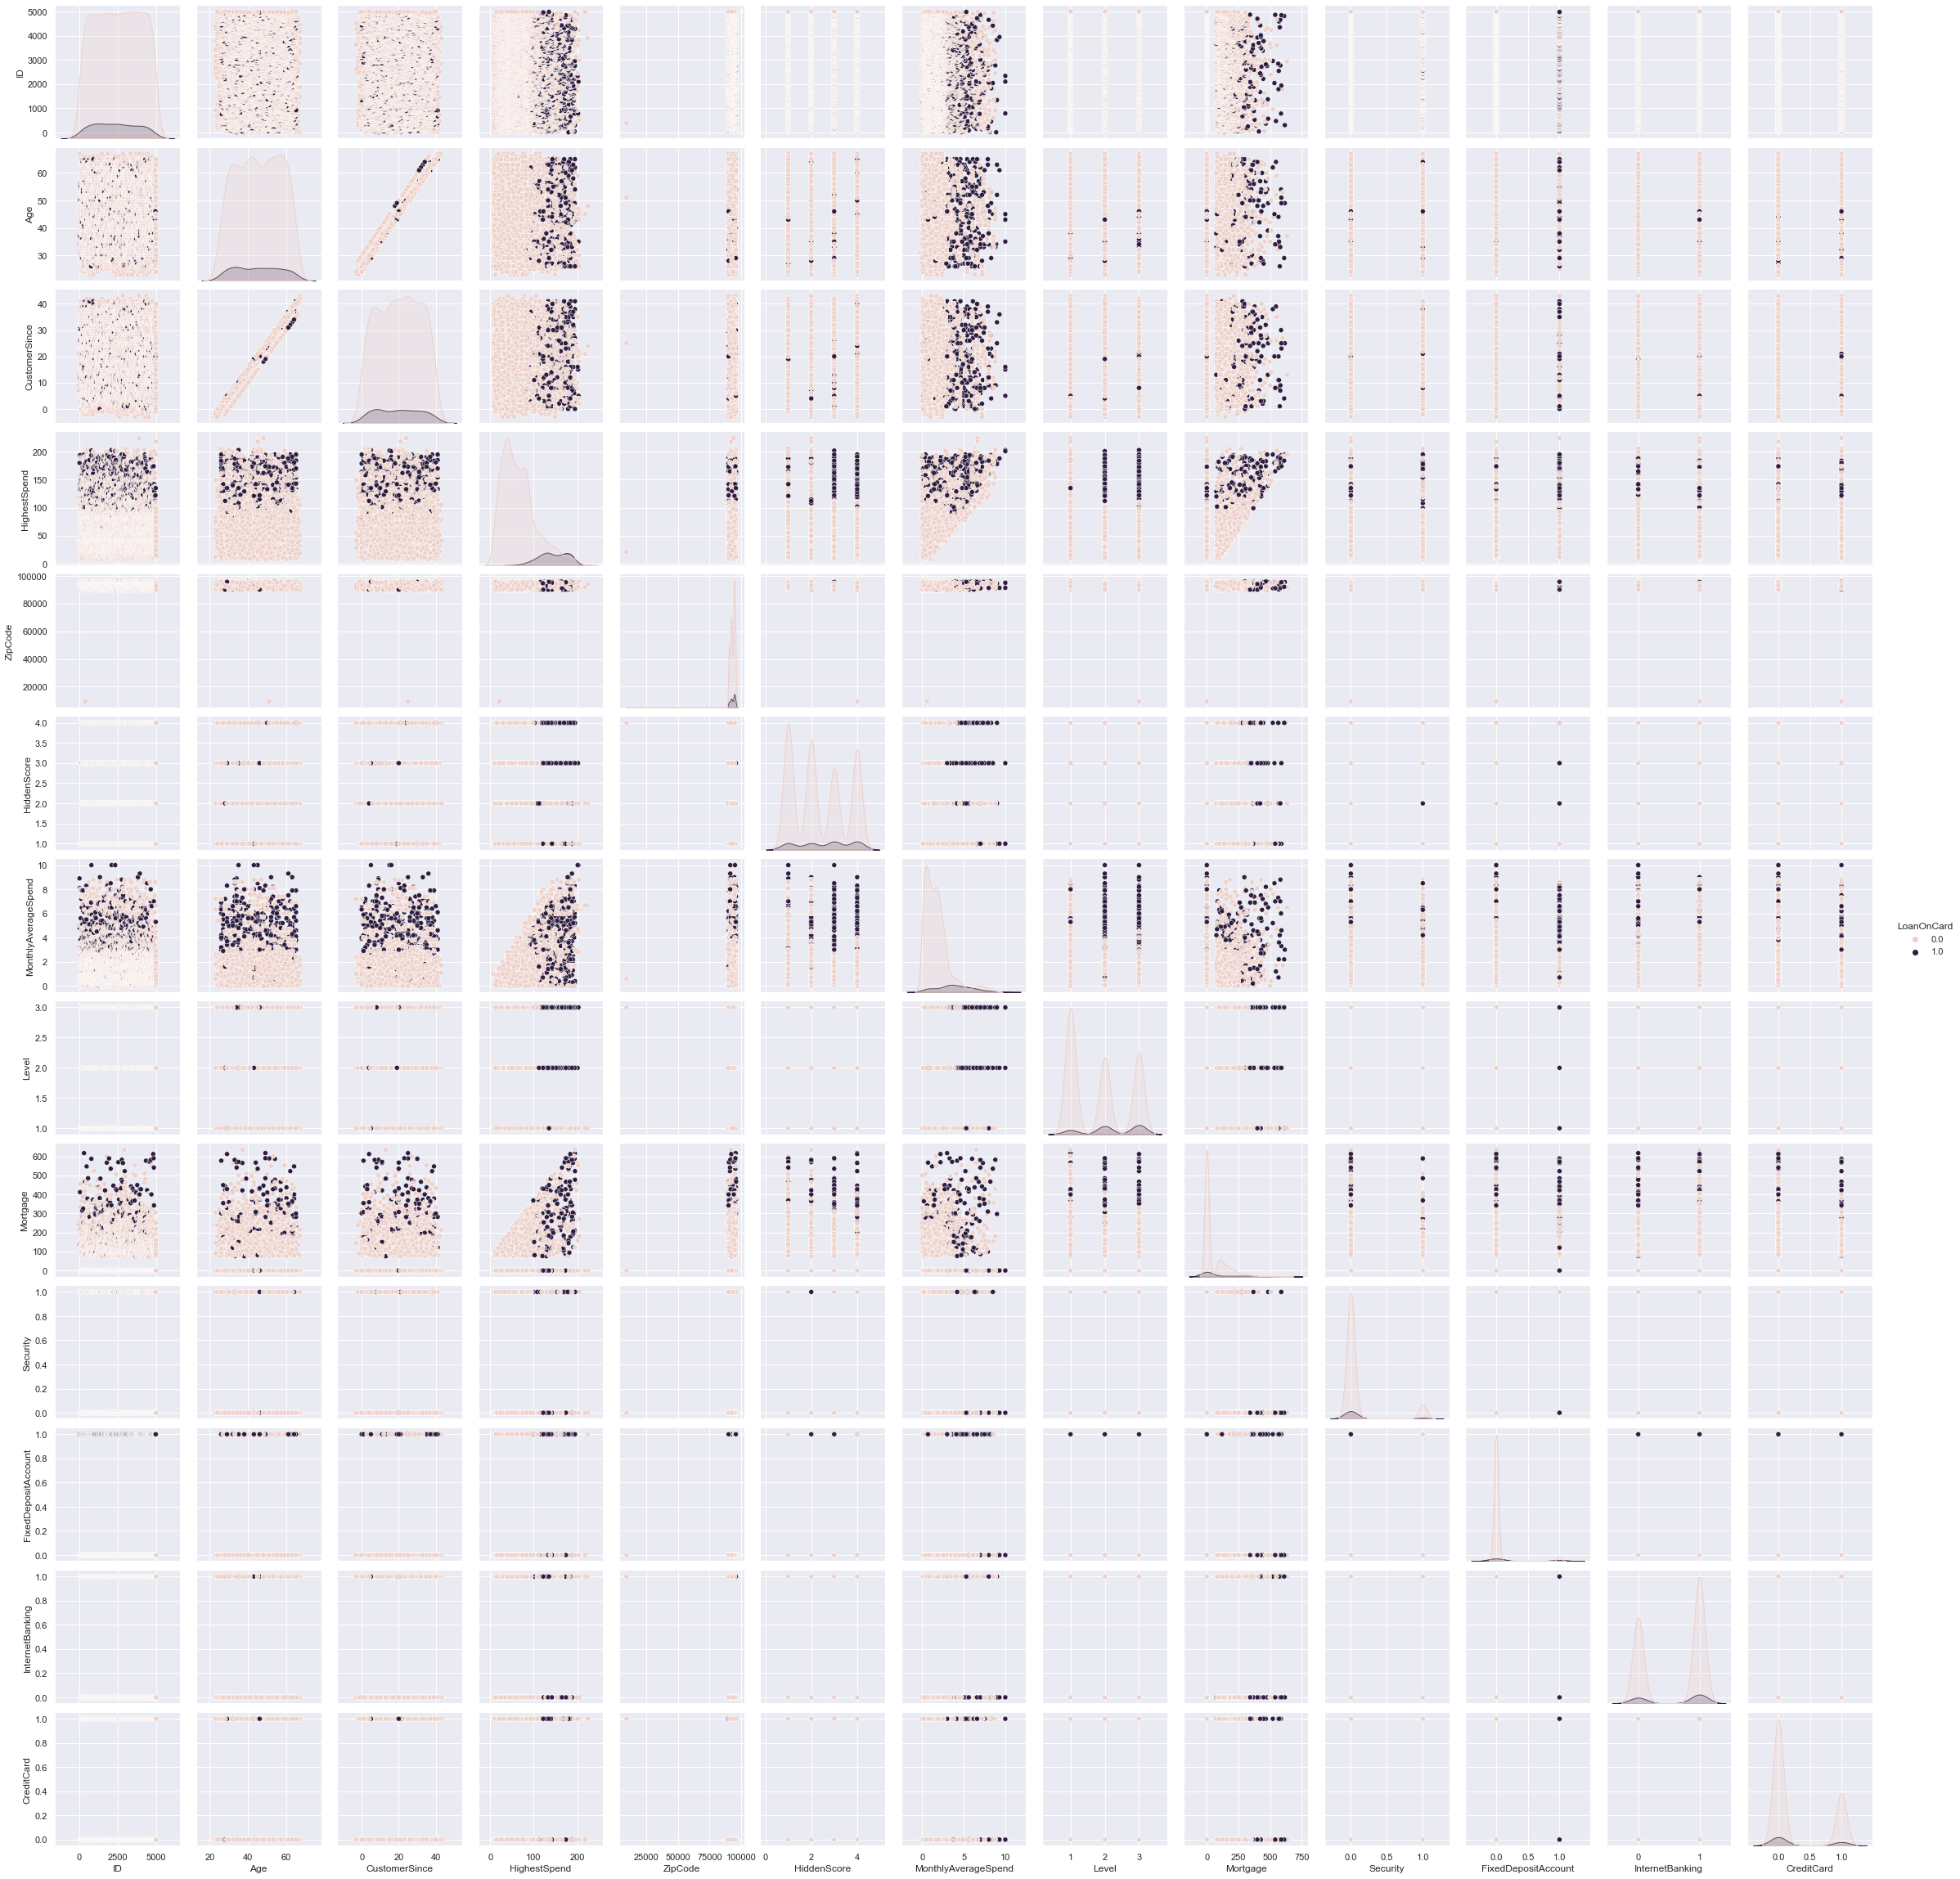

In [115]:
sns.pairplot(banking_Finance_dataset_Raw,diag_kind='kde',hue='LoanOnCard');

    It is better to have pairplot on non categorical data which would help us in better miltivariate analysis

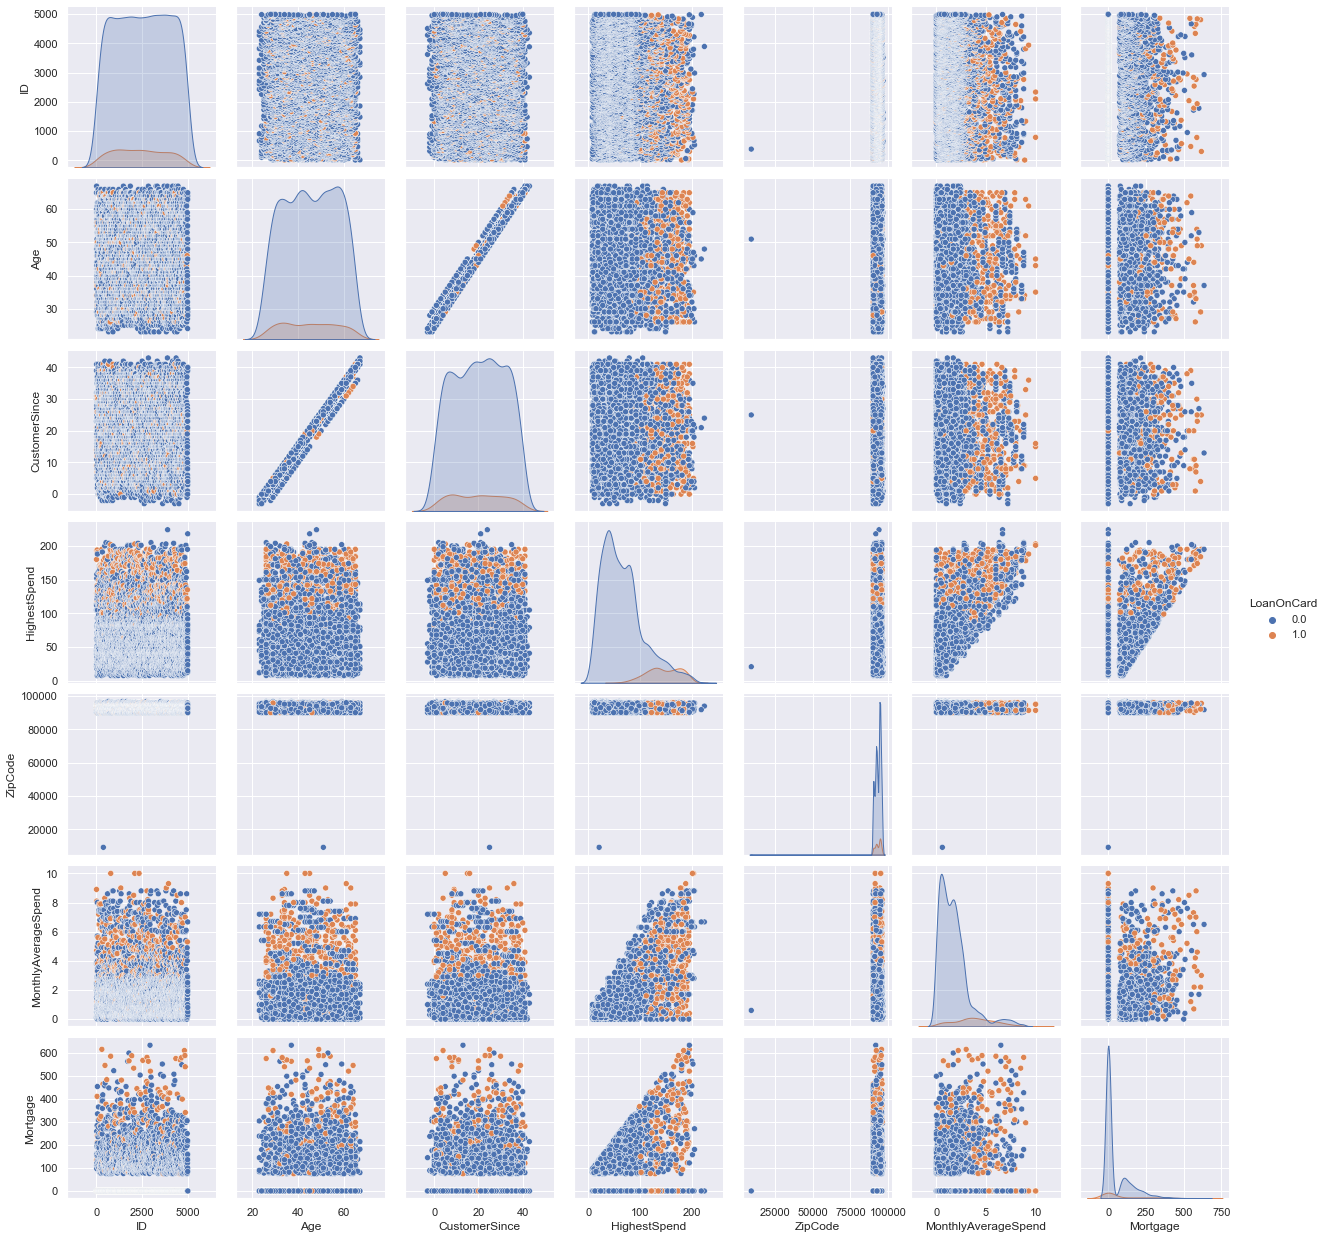

In [116]:
sns.pairplot(banking_Finance_dataset,diag_kind='kde',hue='LoanOnCard');

    Here we can ignore zipcode variable as it is not showing any significant relationship with other variables.
    As we compare he Mortage and HighestSpend variable, people with high mortage tends to have Highest spend
    As we compare he MonthlyAverageSpend and HighestSpend variable, people with high  MonthlyAverageSpend tends to have Highest spend.
    Age and CustomerSince having linear colinearity which is bit obvious and depicted in data as well.

    Lets check the correlation between variables which would help us in determining the columns required for the model building.

In [117]:
banking_Finance_dataset.corr()

ID   Age  CustomerSince  HighestSpend  ZipCode  \
ID                   1.00 -0.01          -0.01         -0.02     0.01   
Age                 -0.01  1.00           0.99         -0.05    -0.03   
CustomerSince       -0.01  0.99           1.00         -0.05    -0.03   
HighestSpend        -0.02 -0.05          -0.05          1.00    -0.02   
ZipCode              0.01 -0.03          -0.03         -0.02     1.00   
MonthlyAverageSpend -0.03 -0.05          -0.05          0.65    -0.00   
Mortgage            -0.02 -0.01          -0.01          0.21     0.01   

                     MonthlyAverageSpend  Mortgage  
ID                                 -0.03     -0.02  
Age                                -0.05     -0.01  
CustomerSince                      -0.05     -0.01  
HighestSpend                        0.65      0.21  
ZipCode                            -0.00      0.01  
MonthlyAverageSpend                 1.00      0.11  
Mortgage                            0.11      1.00

    The data needs more analysis and it is easier to visualize if it is available in heat map.

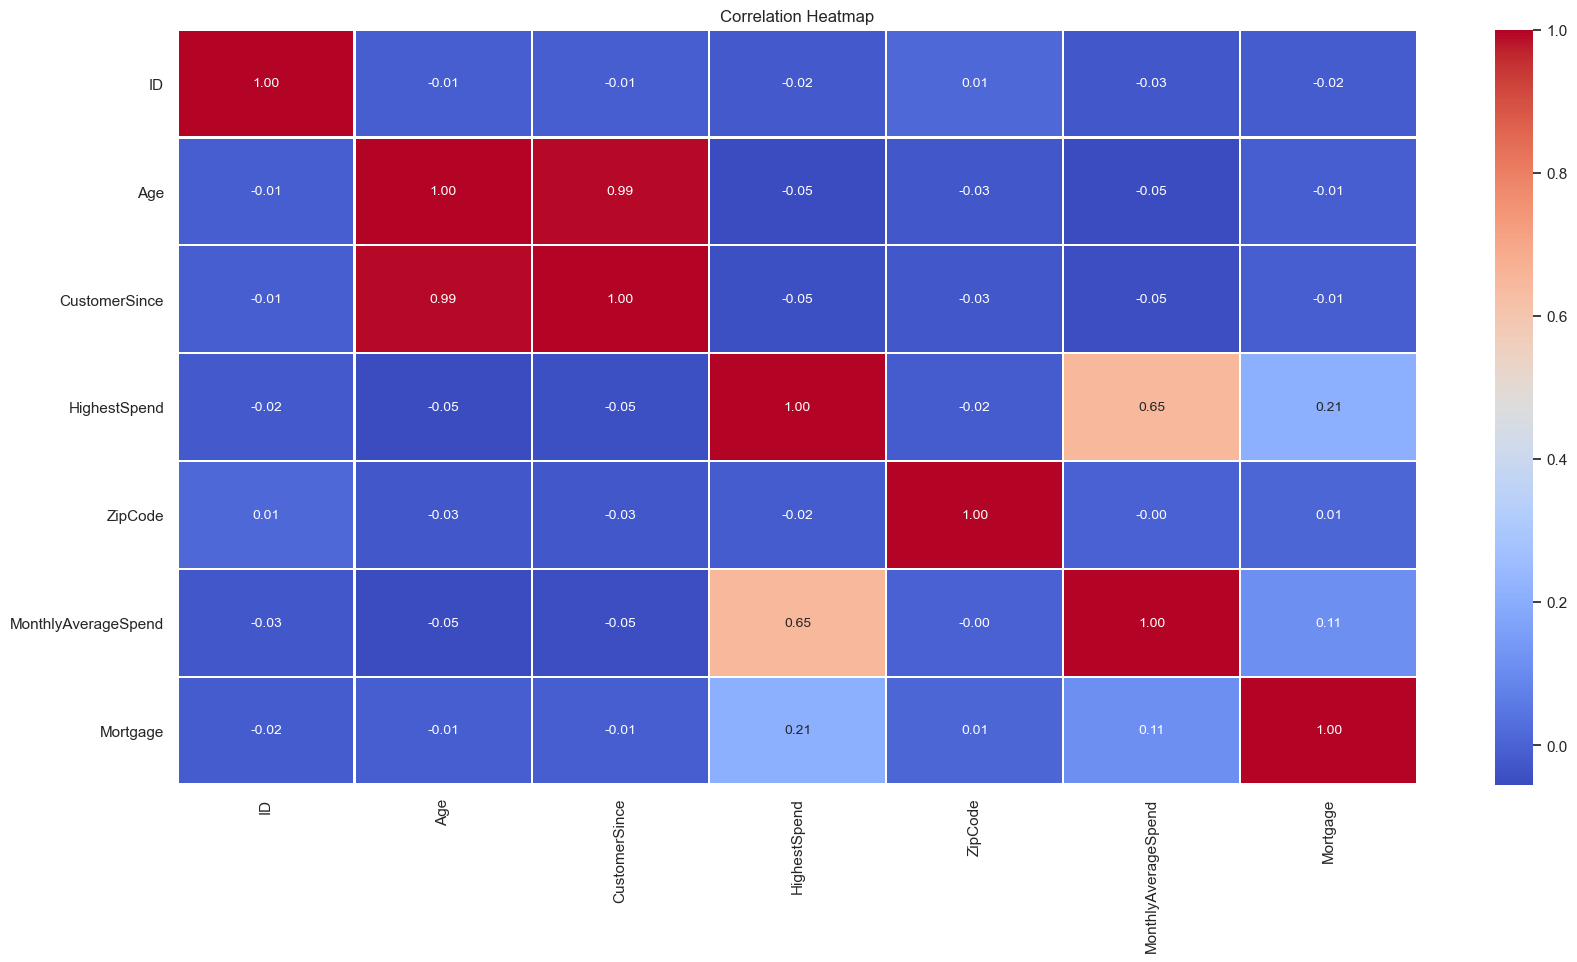

In [118]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = banking_Finance_dataset.corr()

plt.figure(dpi = 100,figsize=(20,10))
sns.heatmap(corr, fmt = ".2f",annot=True,lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

    Lets also check the data distribution on all column from the Raw data set

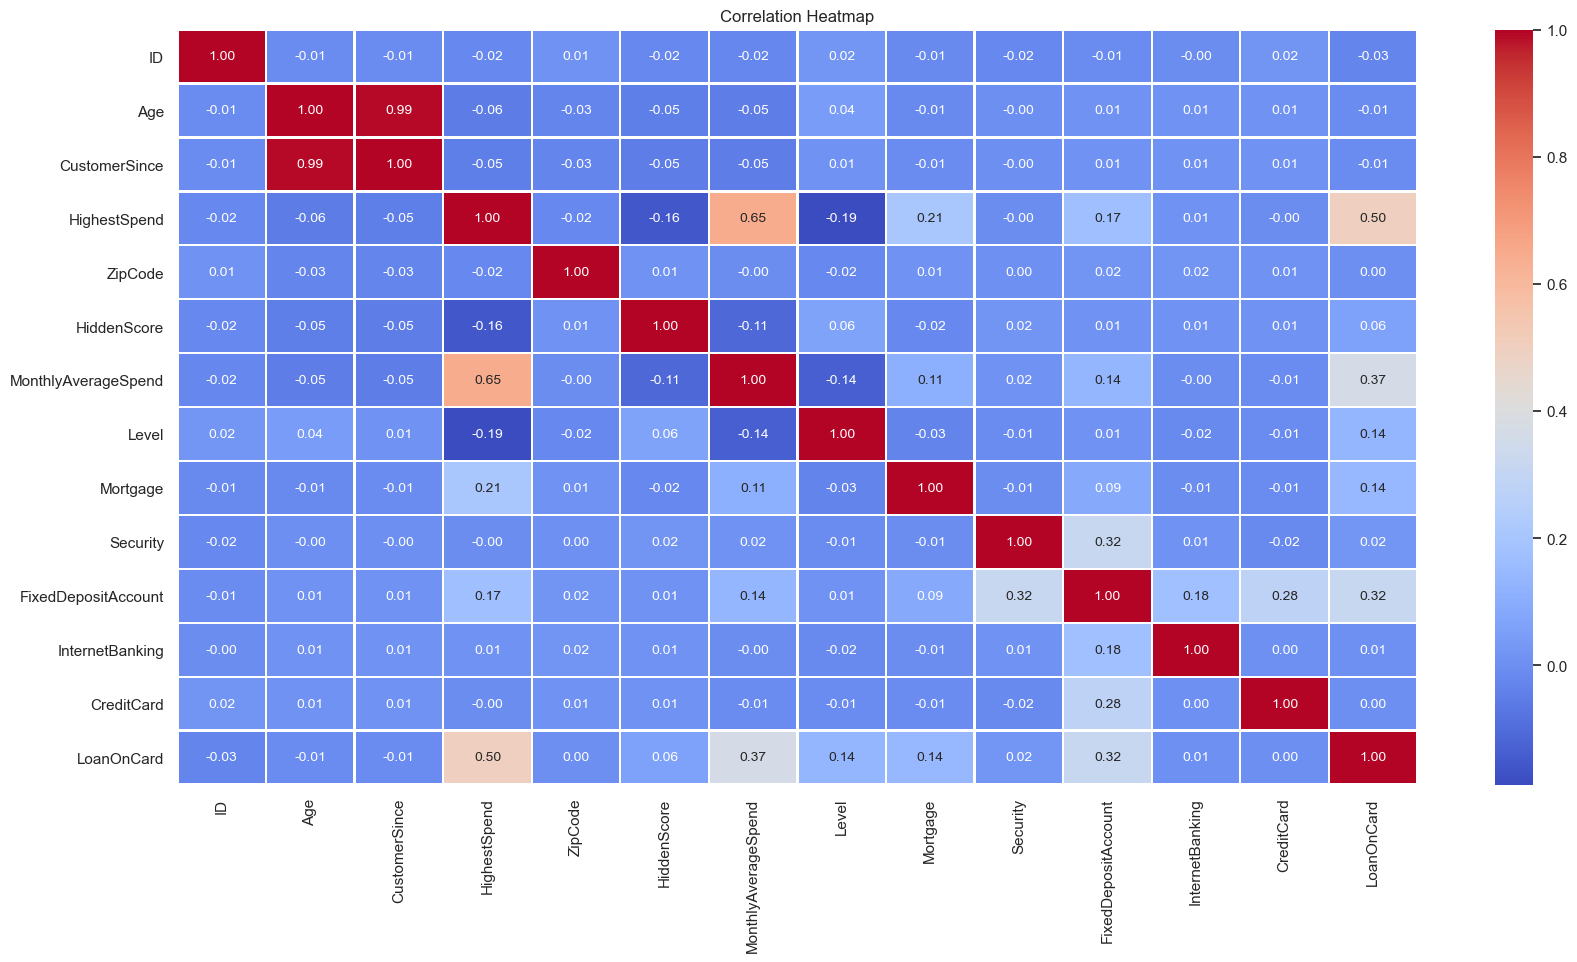

In [119]:
import seaborn as sns
%matplotlib inline

plt.figure(dpi = 100,figsize=(20,10))
sns.heatmap(banking_Finance_dataset_Raw.corr(), fmt = ".2f",annot=True,lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

    From above set of graph we can observe that 
    1) There is no correlation betwee CreditCard and LoanOnCard. We may need to exlcude these variables.
    2) ID column can be ignored as this variable is of no significance.
    3) Zipcode is not having any correlation with the LoanOnCard variable.
    4) Below mentioned variables are having low correlation with LoanOnCard variable
        CustomerSince
        HiddenScore
        Security
        InternetBanking
        
        We need to check for accuracy of model in general when using above mentioned variable.
        
     5) There is good correlation betwen MonthlyAverageSpend and HighestSpend.
     6) Age and customersince is having high correlation - hence we can consider only one variable when building model

###### Response variable distribution check

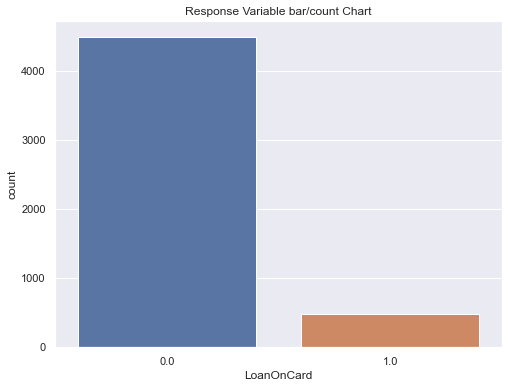

In [121]:
plt.figure(figsize=(8,6))
sns.countplot('LoanOnCard',data=banking_Finance_dataset_Raw).set_title('Response Variable bar/count Chart')
plt.show()

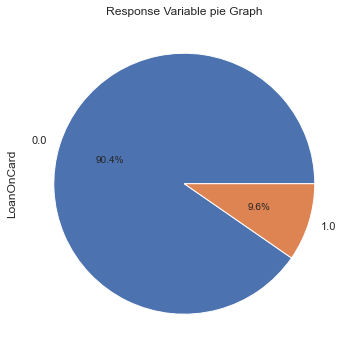

In [123]:
plt.figure(figsize=(8,6))
banking_Finance_dataset['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Response Variable pie Graph')
plt.show()

        There is imbalance in the dataset, which needs to be corrected before building the model for better results.
        Lets check the class summary.

In [124]:
class_summary=banking_Finance_dataset_Raw[['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend','Level','Mortgage','LoanOnCard']].groupby('LoanOnCard') 
class_summary.mean().reset_index()

LoanOnCard   Age  CustomerSince  HighestSpend  HiddenScore  \
0        0.00 45.38          20.15         66.29         2.37   
1        1.00 45.07          19.84        144.75         2.61   

   MonthlyAverageSpend  Level  Mortgage  
0                 1.73   1.84     51.87  
1                 3.91   2.23    100.85

#### Data pre-processing:
	• Segregate predictors vs target attributes
	• Check for target balancing and fix it if found imbalanced.
	• Perform train-test split.


    Based on the correlation, we consider below mentioned variable for model building.
    Age, HighestSpend, HiddenScore, MonthlyAverageSpend, Level, Mortgage, Security, FixedDepositAccount, InternetBanking

In [135]:
#Segregate features and class variables
x_data = banking_Finance_dataset[[  
 'Age',
 'HighestSpend',
 'HiddenScore',
 'MonthlyAverageSpend',
 'Level',
 'Mortgage',
 'Security',
 'FixedDepositAccount',
 'InternetBanking'
]]
y_data = banking_Finance_dataset['LoanOnCard']

    Outlier data, as observed in EDA section - there are outliers on the variable which are considered for model building.
    lets check data using value counts to decide on treating it.

In [136]:
x_data['Mortgage'].value_counts()

0      3447
98       17
91       16
83       16
89       16
119      16
103      16
78       15
102      15
90       15
94       14
87       14
101      14
131      14
144      13
109      13
118      13
81       13
116      13
112      13
104      13
106      13
185      12
97       12
120      12
100      12
121      12
76       12
184      11
95       11
79       11
111      11
86       11
153      11
115      11
137      11
84       11
158      11
82       10
135      10
108      10
151      10
142      10
161      10
117      10
113      10
123       9
167       9
128       9
146       9
221       9
166       9
148       9
88        9
149       9
159       9
110       8
75        8
114       8
122       8
138       8
170       8
194       8
218       8
147       8
169       8
105       8
132       8
157       8
164       8
207       8
205       8
140       8
230       7
129       7
219       7
204       7
193       7
154       7
124       7
85        7
96        7
229       7
174 

In [137]:
x_data['MonthlyAverageSpend'].value_counts()

0.30     240
1.00     229
0.20     204
2.00     188
0.80     187
0.10     183
0.40     177
1.50     176
0.70     169
0.50     163
1.70     158
1.80     151
1.40     136
2.20     129
1.30     127
0.60     117
2.80     110
2.50     107
1.90     106
0.00     106
0.90     105
2.10     100
1.60     100
2.40      91
2.60      87
1.10      82
1.20      66
2.30      57
2.70      56
2.90      54
3.00      53
3.30      45
3.80      43
3.40      39
2.67      36
4.00      32
4.50      29
3.90      27
3.60      27
4.30      26
6.00      26
3.70      25
4.70      24
4.90      22
3.20      22
4.10      22
3.10      20
6.50      18
1.67      18
2.33      18
5.40      18
0.67      18
5.00      18
4.40      17
5.20      16
3.50      15
6.90      14
7.00      14
4.60      14
6.10      14
6.30      13
5.70      13
7.20      13
7.40      13
7.50      12
8.00      12
4.20      11
6.33      10
7.30      10
6.80      10
8.10      10
1.33       9
7.80       9
0.75       9
8.80       9
1.75       9
6.67       9

In [138]:
x_data['HighestSpend'].value_counts()

44     85
38     84
81     82
41     81
39     81
40     77
42     76
83     74
43     70
45     68
29     66
85     65
35     65
21     65
25     64
22     64
30     63
28     63
84     63
55     61
82     60
64     60
78     60
65     60
32     58
61     57
53     57
80     56
58     55
62     55
31     55
23     54
79     53
59     53
54     52
34     52
60     52
18     52
19     51
49     51
33     51
75     47
24     47
70     47
20     47
52     47
63     46
69     46
74     45
50     44
48     44
73     44
71     43
72     40
51     40
90     38
93     37
91     37
68     35
89     34
113    33
15     33
13     32
14     31
114    30
12     30
92     29
98     28
115    27
94     26
11     26
9      26
112    26
88     26
95     25
141    24
101    24
99     24
122    24
128    24
129    23
145    23
125    23
8      23
10     23
111    22
154    21
121    20
105    20
149    20
104    20
134    20
110    19
130    19
118    19
131    19
140    19
155    19
123    18
103    18


    After checking all 3 significant columns in the data set and getting their value counts, we can keep the data as is. The value counts of outliers are repeating and the values which are having less value counts are with in range (i.e. less then max value).

In [139]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X_std = pd.DataFrame(StandardScaler().fit_transform(x_data))
X_std.columns = x_data.columns

    Perform train-test split with 30% test size.
    we apply stratify to get even distribution of data in terms of Class

In [209]:
from sklearn.model_selection import train_test_split
print("Number of records standard Data X: ", X_std.shape)
X_tr, X_tt, y_tr, y_tt = train_test_split(X_std, y_data, test_size = 0.30, random_state = 10)
print("Number of records after splitting X train: ", X_tr.shape)
print("Number of records after splitting X test: ", X_tt.shape)
print("Number of records after splitting y train: ", y_tr.shape)
print("Number of records after splitting y test: ", y_tt.shape)

Number of records standard Data X:  (4980, 9)
Number of records after splitting X train:  (3486, 9)
Number of records after splitting X test:  (1494, 9)
Number of records after splitting y train:  (3486,)
Number of records after splitting y test:  (1494,)


    Lets check whether the target variable train, test are well preserved.

In [216]:
y_tt.to_frame().value_counts(normalize=True)

LoanOnCard
0.0          0.90
1.0          0.10
dtype: float64

In [217]:
y_tr.to_frame().value_counts(normalize=True)

LoanOnCard
0.0          0.90
1.0          0.10
dtype: float64

    Balancing dataset by oversampling minority stratergy

In [226]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_tr, y_tr)
print("Number of records oversample Data X: ", X_over.shape)
print("Number of records oversample Data y: ", y_over.shape)
print("Number of records split train Data X: ", X_tr.shape)
print("Number of records split train Data y: ", y_tr.shape)

Number of records oversample Data X:  (6306, 9)
Number of records oversample Data y:  (6306,)
Number of records split train Data X:  (3486, 9)
Number of records split train Data y:  (3486,)


#### Model training, testing and tuning:
	• Design and train a Logistic regression and Naive Bayes classifiers.
	• Display the classification accuracies for train and test data.
	• Display and explain the classification report in detail.
	• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 


    Navie Bayes will be done at end of this section.

In [227]:
##Design and train a Logistic regression and Naive Bayes classifiers.

# logistic regression object
from sklearn.linear_model import LogisticRegression

#parameter are choosen based on gridsearch output. This is available in two cells below
lr=LogisticRegression(penalty='l2',C=1,solver = 'liblinear',max_iter=300)
# train the model on train set using oversampled train data 
lr.fit(X_over, y_over)

predictions_train = lr.predict(X_over)
predictions_test = lr.predict(X_tt)

In [234]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_over, predictions_train)
print('train Accuracy: ',np.round(train_accuracy,4))

# print classification report
print("classification report for train")
print(classification_report(y_over, predictions_train))

train Accuracy:  0.9028
classification report for train
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      3153
         1.0       0.90      0.91      0.90      3153

    accuracy                           0.90      6306
   macro avg       0.90      0.90      0.90      6306
weighted avg       0.90      0.90      0.90      6306



    For train data : train Accuracy is 90% which is good score for the model
    
    As seen in the classification report, it is having high recall score which is required for this model since we don't want to loose a customer who is having potential to replay the loan
    
    The model is having good precision which signifies which customer to be avoided.
    
    we need to check the confusion matrix for more details on the number for truth v/s prediction.

In [235]:
from sklearn.metrics import accuracy_score
test_accuracy=accuracy_score(y_tt, predictions_test)
print('Test Accuracy: ',np.round(test_accuracy,4))

# print classification report
print("classification report for test")
print(classification_report(y_tt, predictions_test))

Test Accuracy:  0.8762
classification report for test
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      1347
         1.0       0.44      0.91      0.59       147

    accuracy                           0.88      1494
   macro avg       0.71      0.89      0.76      1494
weighted avg       0.93      0.88      0.89      1494



    For test data : test Accuracy is 87% which is good score for the model
    
    As seen in the classification report, it is having high recall score which is required for this model since we don't want to loose a customer who is having potential to replay the loan
    The recall is almost similar to that of the train model
    
    The model is having good precision which signifies which customer to be avoided.
    
    we need to check the confusion matrix for more details on the number for truth v/s prediction.

In [239]:
coef_df = pd.DataFrame(lr.coef_)
coef_df['intercept'] = lr.intercept_
print(coef_df)

      0    1    2    3    4    5     6    7     8  intercept
0 -0.08 2.54 0.64 0.38 1.18 0.04 -0.27 0.75 -0.17      -2.35


    The above information signifies that all variable which are considered are important for model building.

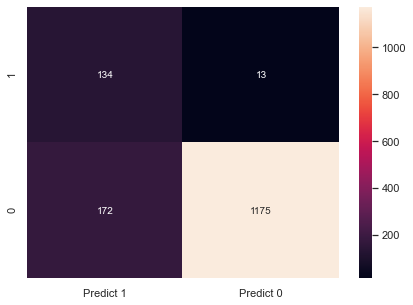

In [243]:
cm=metrics.confusion_matrix(y_tt, predictions_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

    The confusion matrix

    True Positives (TP): predicted true conversion rate 134

    True Negatives (TN): predicted false conversion rate 1175

    False Positives (FP): 13 Falsely predict positive Type I error

    False Negatives (FN): 172 Falsely predict negative Type II error

    Lets check the best parameter for the model using gridsearch from sklearn

In [240]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":[-1,0,1,10,100], "penalty":["l1","l2"], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_over, y_over)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy : 0.9024760395441854


    Solver : Algorithm to use in the optimization problem.
            Here we choose liblinear since for small datasets, ‘liblinear’ is a good choice. And observation also say the same.
    Penalty :  Regularization works by biasing data towards particular values.
            L2 regularization adds an L2 penalty equal to the square of the magnitude of coefficients.
    C : Describes the inverse of regularization strength. It is a contorl variable.
            Here value 10 is choosen

    The same parameters has been used in the earlier designed logistic regression classifier.

    Lets check model performance with cross validation

In [244]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_over, y_over, cv=100)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.90625    0.90625    0.90625    0.8125     0.921875   0.84375
 0.85714286 0.92063492 0.82539683 0.88888889 0.84126984 0.92063492
 0.92063492 0.93650794 0.95238095 0.88888889 0.92063492 0.92063492
 0.96825397 0.92063492 0.88888889 0.93650794 1.         0.92063492
 0.93650794 0.88888889 0.87301587 0.88888889 0.85714286 0.79365079
 0.95238095 0.9047619  0.88888889 0.88888889 0.92063492 0.92063492
 0.95238095 0.87301587 0.95238095 0.87301587 0.93650794 0.92063492
 0.87301587 0.87301587 0.93650794 0.79365079 0.80952381 0.92063492
 0.88888889 0.93650794 0.88888889 0.82539683 0.9047619  0.98412698
 0.93650794 0.87301587 0.87301587 0.87301587 0.92063492 0.92063492
 0.85714286 0.88888889 0.87301587 0.88888889 0.9047619  0.88888889
 0.93650794 0.87301587 0.88888889 0.87301587 0.82539683 0.93650794
 0.92063492 0.9047619  0.95238095 0.95238095 0.88888889 0.93650794
 0.82539683 0.93650794 0.95238095 0.96825397 0.96825397 0.82539683
 0.9047619  0.88888889 0.8888888

(0.7936507936507936, 0.9012227182539684, 1.0)

    The mean value of accuracy is 90 which is what we achieved in earlier model.

##### NB classifier

In [249]:
clf = GaussianNB()
clf.fit(X_over, y_over)
nb_predictions_test = clf.predict(X_tt)

In [254]:
from sklearn.metrics import accuracy_score
nb_test_accuracy=accuracy_score(y_tt, nb_predictions_test)
print('Test Accuracy: ',np.round(nb_test_accuracy,4))

# print classification report
print("classification report for test")
print(classification_report(y_tt, nb_predictions_test))

Test Accuracy:  0.8568
classification report for test
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.92      1347
         1.0       0.39      0.78      0.52       147

    accuracy                           0.86      1494
   macro avg       0.68      0.82      0.72      1494
weighted avg       0.92      0.86      0.88      1494



    For test data : test Accuracy is 85%
    
    As seen in the classification report, it is having high recall score (of aroung 78%) which is required for this model since we don't want to loose a customer who is having potential to replay the loan
    The recall is almost similar to that of the train model
    
    we need to check the confusion matrix for more details on the number for truth v/s prediction.

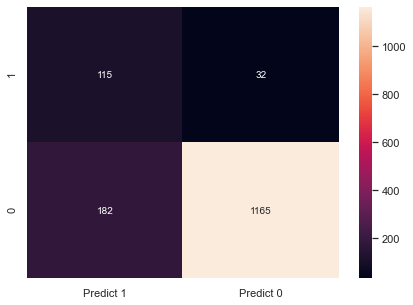

In [256]:
#For NB
cm=metrics.confusion_matrix(y_tt, nb_predictions_test, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

    The confusion matrix

    True Positives (TP): predicted true conversion rate 115

    True Negatives (TN): predicted false conversion rate 1165

    False Positives (FP): 32 Falsely predict positive Type I error

    False Negatives (FN): 182 Falsely predict negative Type II error

    Lets check the AUC ROC curve to check the model performance

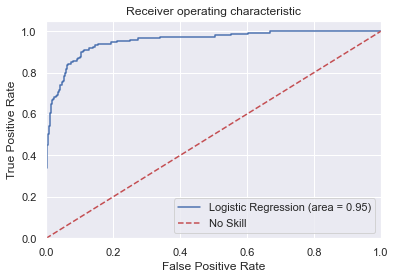

0.9540273421915164


In [259]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_tt, lr.predict_proba(X_tt)[:,1])
fpr, tpr, thresholds = roc_curve(y_tt, lr.predict_proba(X_tt)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print(logit_roc_auc)

    Generally a thumb rule followed while measuring model - with value more than 0.75 is good.
    Here we have good AUC value which signifies that the model can be used.

Best Threshold=0.536350, G-Mean=0.899


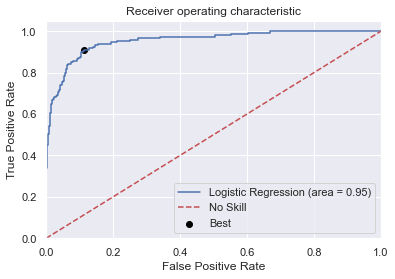

In [260]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax

logit_roc_auc = roc_auc_score(y_tt, lr.predict_proba(X_tt)[:,1])
fpr, tpr, thresholds = roc_curve(y_tt, lr.predict_proba(X_tt)[:,1])
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

    Since the Threshold value of 0.53 has been observed, it mean while classification, we should use 0.53 as threshold. If the probability of particular customer is above 0.53 then only we can say that he belongs to class 1 or he will avail for loan else assign him the class 0 mean he won't avail for loan.

#### Conclusion and improvisation:
	• Write your conclusion on the results.
	• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the Bank to perform a better data analysis in future.

The models which we have built are logistic regression and naive bayes, here logistic regression is best suited for the classification since it is having better accuracy and recall score.

As it is observed in confusion matrix, Type 1 and Type 2 errors are less in logistic regression and hence this model may provide better result which used in production.

The model has correctly predicted True positive and true negative and comparison of number proves that model can be used.

If the probability of particular customer is above 0.53 then only we can say that he belongs to class 1 or he will avail for loan else assign him the class 0 mean he won't avail for loan.

###### Improvements

    To make  insight-driven marketing campaigns, banks must think about customised recommendation for  individual needs.
    
    This need collection of more data about customer. Customer purchase history would help us here in getting more insight.
    
    If possible customer behavioural and psychographic  data can be collected for better customer segmentation.
    
    If allowed, customer social media data can be analysed which gives insight into customer desires.
    
    If possible, we can getting customer salary and type of work (salaried employee, self employed) would also help.